# TRABALHO PR√ÅTICO DE IA - TRABALHO 3

Alunos:

        1. Thiago Rodrigo Monteiro Salgado - Engenharia da Computa√ß√£o (21954456)
        2. Jo√£o Victor de Carvalho Marques - Engenharia da Computa√ß√£o (21952894)
        3. Erllison de Queiroz Reis - Ci√™ncia da Computa√ß√£o (22152252)
        4. Francisco Rivail Santos da Luz Junior  - Ci√™ncia da Computa√ß√£o (22152249)

In [ ]:
import sys
import os

In [ ]:
# %config InlineBackend.figure_format = 'retina' # Make visualizations look good
# #%config InlineBackend.figure_format = 'svg'
# %matplotlib inline

# if 'google.colab' in sys.modules:
#   !pip install -q dtreeviz

In [ ]:
%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

!pip install -q dtreeviz fuzzy-c-means

In [ ]:
# Importa√ß√£o das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.graph_objects as go


from fcmeans import FCM
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import dtreeviz
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

Fun√ß√£o para retornar CSV passado pelo Professor, para evitar de fazer upload de CSV o tempo inteiro que o Colab reinicia.

In [155]:
import pandas as pd
from io import StringIO

def load_trains_data():
    """
    Retorna os dados do dataset trains_data como um DataFrame.
    """
    csv_data = """Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
4,3,2,long,closedrect,3,rectanglod(short),2,short,openrect,1,trianglod,2,long,openrect,1,rectanglod(long),None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
4,2,2,short,openrect,1,circlelod,2,short,closedtrap,1,trianglod,2,short,openrect,2,circlelod,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
4,3,2,short,closedrect,1,circlelod,2,short,openrect,1,rectanglod(medium),2,short,ushaped,1,trianglod,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
5,4,2,short,openrect,1,rectanglod(medium),2,long,openrect,3,rectanglod(short),2,short,ushaped,1,trianglod,2,short,opentrap,1,circlelod,1,1,0,0,0,0,1,0,0,0,east
4,3,2,short,ushaped,1,rectanglod(medium),2,short,closedtrap,1,circlelod,2,short,closedrect,1,trianglod,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
4,1,2,short,ushaped,1,circlelod,2,short,opentrap,1,circlelod,2,short,opentrap,2,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,1,east
5,4,2,long,closedrect,1,rectanglod(long),2,short,openrect,1,circlelod,2,short,ushaped,1,rectanglod(medium),2,short,openrect,1,trianglod,0,1,0,1,0,0,0,0,0,0,east
3,2,2,short,ushaped,1,trianglod,2,short,dbclosedrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
5,3,2,long,closedrect,2,invtrianglod,3,long,openrect,1,rectanglod(long),2,short,opentrap,1,circlelod,2,short,openrect,1,circlelod,0,0,0,1,0,0,0,0,0,1,east
3,2,3,long,openrect,1,rectanglod(long),2,short,ushaped,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
5,2,2,short,openrect,1,trianglod,2,short,closedtrap,1,trianglod,3,long,openrect,3,rectanglod(short),2,short,ushaped,1,trianglod,0,1,0,0,1,0,0,0,0,0,east
5,2,2,short,ushaped,2,trianglod,2,short,opentrap,1,rectanglod(medium),2,short,openrect,1,rectanglod(medium),2,short,ellipse,1,rectanglod(medium),1,0,0,0,0,0,0,0,0,0,east
3,2,2,short,ellipse,1,trianglod,2,short,ushaped,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
5,3,2,long,jaggedtop,1,rectanglod(long),2,short,openrect,1,trianglod,2,short,openrect,1,trianglod,2,short,dbsloptop,1,circlelod,0,1,0,0,1,0,1,0,0,0,east
3,2,2,short,ushaped,1,trianglod,2,short,opentrap,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
3,2,2,short,openrect,1,circlelod,2,short,openrect,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
5,3,2,short,ushaped,1,trianglod,2,long,closedrect,1,circlelod,2,short,closedrect,1,circlelod,2,long,openrect,1,rectanglod(long),0,0,0,1,0,0,1,0,0,1,east
5,3,2,short,opentrap,1,trianglod,2,short,dbclosedrect,1,diamondlod,2,long,openrect,3,rectanglod(short),2,short,ushaped,1,diamondlod,0,0,1,0,0,1,0,0,0,0,east
4,3,2,short,ellipse,1,rectanglod(medium),2,short,ushaped,1,trianglod,2,short,opentrap,2,circlelod,None,None,None,None,None,0,1,0,0,0,0,1,0,0,0,east
4,2,2,short,openrect,1,circlelod,2,short,openrect,1,trianglod,2,short,opentrap,1,trianglod,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,east
4,3,2,long,openrect,1,rectanglod(long),3,long,closedrect,1,invtrianglod,2,short,ellipse,1,invtrianglod,None,None,None,None,None,0,1,0,0,0,0,1,0,0,0,east
4,2,2,short,openrect,1,trianglod,2,short,dblopnrect,1,diamondlod,2,short,ushaped,1,trianglod,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,east
4,2,2,short,openrect,1,rectanglod(medium),2,short,hexagon,1,circlelod,3,long,openrect,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
5,2,2,short,openrect,1,circlelod,2,short,openrect,1,circlelod,2,short,openrect,1,trianglod,2,short,openrect,1,trianglod,0,0,0,0,1,0,0,0,0,1,east
5,2,2,long,jaggedtop,1,circlelod,2,long,openrect,2,circlelod,2,short,ushaped,1,circlelod,2,short,sloptop,1,diamondlod,0,0,0,0,0,0,0,0,0,1,east
5,2,2,short,closedtrap,1,circlelod,2,short,opentrap,1,trianglod,2,short,opentrap,2,circlelod,2,short,closedrect,1,trianglod,0,0,0,0,0,0,1,0,0,0,west
4,3,2,long,openrect,3,rectanglod(short),2,short,opentrap,1,trianglod,2,short,openrect,1,circlelod,None,None,None,None,None,0,1,0,0,0,0,1,0,0,0,west
4,2,2,short,openrect,1,circlelod,3,long,closedrect,1,hexaglod,2,short,dblopnrect,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,west
3,2,2,short,openrect,1,circlelod,2,short,closedrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
5,4,2,short,dblopnrect,1,circlelod,2,short,sloptop,1,trianglod,3,long,jaggedtop,1,rectanglod(long),2,short,openrect,1,diamondlod,0,1,0,0,0,0,1,0,0,0,west
5,4,3,long,closedrect,3,hexaglod,2,long,openrect,3,rectanglod(short),2,short,openrect,1,trianglod,2,long,closedrect,1,rectanglod(long),0,1,1,0,0,0,0,0,0,0,west
4,2,2,short,ushaped,1,circlelod,3,long,openrect,1,circlelod,2,short,ellipse,1,trianglod,None,None,None,None,None,0,0,0,0,0,0,1,0,0,1,west
5,2,2,short,ellipse,1,trianglod,2,short,ushaped,1,circlelod,2,short,opentrap,1,circlelod,2,short,closedtraptop,1,circlelod,0,0,0,0,0,0,1,0,0,1,west
5,4,2,short,opentrap,1,rectanglod(medium),2,short,openrect,1,diamondlod,2,short,sloptop,1,trianglod,3,long,openrect,1,circlelod,0,0,0,0,0,0,1,0,0,0,west
3,1,2,short,openrect,1,trianglod,2,short,closedushaped,1,trianglod,2,None,None,None,None,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
5,3,2,short,ellipse,1,trianglod,2,short,hexagon,1,rectanglod(medium),2,long,openrect,3,circlelod,2,short,openrect,1,trianglod,0,1,0,1,0,0,1,0,0,0,west
4,2,2,short,hexagon,1,rectanglod(medium),2,short,ushaped,1,circlelod,2,long,jaggedtop,1,rectanglod(long),None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
4,2,2,long,closedrect,3,rectanglod(short),2,short,openrect,1,trianglod,2,long,jaggedtop,1,rectanglod(long),None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
4,3,2,short,ushaped,1,trianglod,2,short,openrect,1,circlelod,2,short,ushaped,1,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,1,0,0,0,west
3,2,2,short,dblopnrect,1,circlelod,2,short,ushaped,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
3,2,3,long,jaggedtop,1,rectanglod(long),2,short,opentrap,2,trianglod,None,None,None,None,None,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
3,2,2,short,dblopnrect,1,trianglod,2,short,openrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
3,2,2,short,dblopnrect,1,circlelod,2,short,openrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
5,2,2,long,jaggedtop,1,circlelod,2,long,jaggedtop,2,rectanglod(medium),2,long,openrect,3,rectanglod(short),2,short,ushaped,1,rectanglod(medium),1,0,0,1,0,0,0,0,0,0,west
4,3,2,short,ushaped,1,circlelod,2,short,openrect,1,trianglod,3,long,closedrect,1,hexaglod,None,None,None,None,None,0,0,0,0,0,1,1,0,0,0,west
5,2,3,long,jaggedtop,1,rectanglod(long),2,short,ellipse,1,rectanglod(medium),2,short,ushaped,1,rectanglod(medium),2,short,openrect,2,trianglod,1,1,0,0,0,0,0,0,0,0,west
4,2,2,short,ushaped,1,trianglod,2,short,opentrap,1,circlelod,2,short,openrect,1,trianglod,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
3,2,3,long,openrect,1,circlelod,2,short,closedrect,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
3,2,2,short,openrect,1,rectanglod(medium),2,short,hexagon,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
5,2,2,short,ushaped,1,trianglod,3,long,jaggedtop,1,invtrianglod,2,short,opentrap,1,circlelod,2,short,dblopnrect,1,circlelod,0,0,0,0,0,0,0,0,0,1,west
4,3,2,short,dblopnrect,1,rectanglod(medium),2,short,openrect,1,trianglod,3,long,openrect,3,rectanglod(short),None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
5,3,2,short,openrect,1,trianglod,3,long,closedrect,1,invtrianglod,2,short,opentrap,1,trianglod,2,short,ushaped,1,rectanglod(medium),0,1,0,0,1,0,0,0,0,0,east
3,2,2,short,openrect,1,rectanglod(medium),2,short,dblopnrect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
4,1,2,short,sloptop,1,circlelod,3,long,closedrect,None,None,2,short,closedrect,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
4,1,2,short,openrect,1,circlelod,2,short,openrect,1,circlelod,2,short,opentrap,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,1,east
5,3,2,short,ushaped,1,trianglod,3,long,openrect,3,rectanglod(short),2,short,openrect,1,circlelod,2,short,openrect,1,circlelod,0,1,0,1,0,0,0,0,0,1,east
4,3,3,long,jaggedtop,1,rectanglod(long),2,long,jaggedtop,3,hexaglod,2,short,openrect,1,trianglod,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,east
4,2,2,short,traptop,1,circlelod,2,short,hexagon,1,circlelod,2,short,openrect,1,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,0,0,0,1,east
5,3,2,short,ushaped,1,circlelod,2,long,jaggedtop,1,rectanglod(long),2,short,opentrap,1,trianglod,2,short,dblopnrect,1,trianglod,0,1,0,1,1,0,0,0,0,0,east
5,2,2,short,dblopnrect,1,circlelod,3,short,closedtrap,1,circlelod,2,short,dblopnrect,1,circlelod,2,short,sloptop,1,trianglod,0,0,0,0,0,0,1,0,0,1,east
5,3,3,long,openrect,1,rectanglod(long),2,long,closedrect,1,rectanglod(long),2,short,dblopnrect,1,circlelod,2,short,closedtraptop,1,rectanglod(medium),1,0,0,1,0,0,0,0,0,0,east
4,3,2,short,dbclosedrect,1,trianglod,2,long,openrect,1,rectanglod(long),2,short,ellipse,2,rectanglod(short),None,None,None,None,None,1,1,0,0,0,0,0,0,0,0,east
5,1,2,short,hexagon,1,trianglod,3,short,opentrap,1,trianglod,2,short,sloptop,1,trianglod,2,short,openrect,1,trianglod,0,0,0,0,1,0,0,0,0,0,east
3,2,2,short,openrect,1,trianglod,3,short,openrect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
4,2,2,short,closedrect,1,circlelod,2,long,jaggedtop,3,rectanglod(short),2,short,ushaped,1,circlelod,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
5,2,2,short,openrect,1,trianglod,2,long,jaggedtop,2,rectanglod(medium),2,short,openrect,1,trianglod,None,None,None,None,None,0,1,0,0,1,0,0,0,0,0,east
4,2,3,long,closedrect,2,rectanglod(medium),3,long,openrect,2,rectanglod(medium),2,short,closedrect,1,circlelod,None,None,None,None,None,1,0,0,1,0,0,1,0,0,0,east
5,4,3,long,closedrect,3,rectanglod(short),2,short,dblopnrect,1,diamondlod,2,long,openrect,1,invtrianglod,2,short,openrect,1,circlelod,0,0,1,0,0,1,0,0,0,0,east
3,0,3,long,closedrect,0,None,3,long,openrect,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,east
4,2,2,long,closedrect,1,circlelod,2,short,openrect,1,circlelod,2,long,openrect,3,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,0,0,0,1,east
5,3,2,short,ushaped,1,rectanglod(medium),3,long,closedrect,1,rectanglod(long),2,short,dblopnrect,1,trianglod,2,short,opentrap,1,trianglod,1,1,0,0,1,0,0,0,0,0,east
4,2,2,short,openrect,1,circlelod,2,short,openrect,1,diamondlod,2,short,opentrap,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
3,2,2,short,hexagon,1,trianglod,2,short,closedtraptop,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
5,2,2,short,closedushaped,1,circlelod,2,short,ellipse,1,circlelod,3,short,openrect,1,rectanglod(long),2,short,opentrap,1,circlelod,0,0,0,1,0,0,0,0,0,1,east
3,2,2,short,openrect,1,trianglod,2,short,openrect,1,rectanglod(medium),None,None,None,0,None,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
3,2,2,short,ellipse,1,rectanglod(medium),3,long,openrect,1,hexaglod,None,None,None,None,None,None,None,None,None,None,0,0,1,0,0,0,0,0,0,0,west
4,1,2,long,closedrect,0,None,2,short,openrect,1,trianglod,2,short,opentrap,1,trianglod,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
5,3,2,short,openrect,1,circlelod,3,long,closerect,3,rectanglod,2,short,openrect,1,circlelod,2,long,closerect,1,rectanglod(long),0,0,0,1,0,0,0,0,0,0,west
5,3,2,long,openrect,1,hexaglod,2,short,openrect,1,trianglod,2,short,hexagon,1,circlelod,2,short,openrect,1,circlelod,0,0,0,0,0,1,1,0,0,1,west
5,3,2,short,hexagon,1,circlelod,2,long,closerect,3,rectanglod,2,short,closerect,1,rectanglod(medium),2,short,opentrap,1,trianglod,1,1,0,1,0,0,0,0,0,0,west
4,3,3,long,closedrect,1,hexaglod,2,short,opentrap,1,rectanglod(medium),2,short,openrect,1,circlelod,None,None,None,None,None,0,0,1,1,0,0,0,0,0,0,west
5,3,3,long,closedrect,2,rectanglod(medium),3,long,closerect,3,rectanglod(short),2,long,closerect,3,rectanglod(short),2,short,opentrap,1,trianglod,1,1,0,0,0,0,0,0,0,0,west
3,2,2,short,openrect,1,trianglod,2,long,closerect,3,hexaglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,west
4,2,2,long,closedrect,1,hexaglod,2,long,jaggedtop,1,rectanglod(long),2,long,jaggedtop,None,None,None,None,None,None,None,0,0,1,0,0,0,0,0,0,0,west
5,3,2,short,ushaped,1,circlelod,2,long,closerect,3,rectanglod(short),2,short,openrect,1,circlelod,2,short,openrect,1,rectanglod(medium),0,0,0,1,0,0,0,0,0,0,west
4,3,2,short,dbclosedrect,1,rectanglod(medium),2,short,opentrap,1,trianglod,2,short,opentrap,1,diamondlod,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
5,3,3,long,closedrect,3,rectanglod(short),2,short,opentrap,2,trianglod,2,short,opentrap,1,trianglod,2,short,hexagon,1,circlelod,0,1,0,0,1,0,1,0,0,0,west
4,3,3,long,jaggedtop,2,rectanglod(medium),2,short,openrect,1,circlelod,2,long,closerect,1,rectanglod(long),None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
4,2,2,short,openrect,1,circlelod,2,short,closerect,1,rectanglod(medium),2,short,opentrap,1,circlelod,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
4,3,2,short,openrect,1,circlelod,2,long,closerect,3,rectanglod(short),2,short,openrect,1,rectanglod(medium),None,None,None,None,None,1,0,0,1,0,0,0,0,0,0,west
3,2,3,long,closedrect,1,upsidedowntri,2,short,ushape,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
3,2,2,short,openrect,1,trianglod,2,short,openrect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
5,1,2,short,closedushaped,1,circlelod,3,long,closerect,None,None,3,long,closerect,1,circlelod,2,short,dbopenrect,1,circlelod,0,0,0,0,0,0,0,0,0,1,west
5,3,2,short,ushapedhousetop,1,trianglod,2,short,ellipse,1,diamondlod,2,long,openrect,1,rectanglod(long),2,long,openrect,1,rectanglod(long),1,0,0,0,0,0,0,0,0,0,west
3,2,2,short,dbopenrect,1,trianglod,2,long,closerect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
5,3,2,short,dbopenrect,1,trianglod,2,short,opentrap,1,trianglod,2,short,hexagon,1,circlelod,2,long,openrect,3,rectanglod(short),0,0,0,1,1,0,1,0,0,0,west
3,2,2,long,closerect,3,rectanglod(short),2,short,hexagon,2,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
3,2,3,long,closerect,3,rectanglod(short),2,short,housetoprect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
3,1,2,short,openrect,1,trianglod,2,short,housetoprect,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
4,3,2,short,ushaped,1,trianglod,2,short,opentrap,1,circlelod,2,short,opentrap,1,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,1,0,0,0,west
"""
    return pd.read_csv(StringIO(csv_data))

In [156]:
import pandas as pd
from io import StringIO

def load_category_data():
    """
    Retorna os dados do category como um DataFrame.
    """
    csv_data = """Attribute,Category,Code
Length,short,1
,long,2
Shape,closedblopnrect,1
,closedrect,2
,closedtrap,3
,closedushaped,4
,dblopnrect,5
,ellipse,6
,hexagon,7
,jaggedrect,8
,openrect,9
,opentrap,10
,slopetopdblopnrect,11
,slopetoprect,12
,slopetoptrap,13
,slopetopushaped,14
,ushaped,15
load_shapes,circlelod,1
,Hexagonlod,2
,rectanglod,3
,trianglod,4
"""
    return pd.read_csv(StringIO(csv_data))

# Quest√£o 1

## Prepara√ß√£o de Dados

Nesta quest√£o, utilizaremos os seguintes arquivos:

- `trains-updated.csv`: cont√©m os dados originais dos trens.
- `trains-data_coded.csv`: cont√©m os c√≥digos utilizados para padroniza√ß√£o das colunas.

Certifique-se de que ambos os arquivos est√£o presentes no sistema de arquivos antes de prosseguir.

### Etapas da Prepara√ß√£o:
1. **Padroniza√ß√£o dos Dados:**  
   - A tabela de trens ser√° padronizada para inteiros com base nos c√≥digos fornecidos no arquivo `trains-data_coded.csv`.
   
2. **Normaliza√ß√£o:**  
   - Ap√≥s a padroniza√ß√£o, os dados ser√£o normalizados para garantir consist√™ncia e facilitar o processamento nos passos seguintes.

Estes passos s√£o fundamentais para preparar os dados para an√°lises posteriores e para a aplica√ß√£o de t√©cnicas como clustering.


In [157]:
trains_uptated = load_trains_data()

In [158]:
category_code = load_category_data()

In [ ]:
df100 = load_trains_data()

In [159]:
df_main = trains_uptated.copy()

# DataFrame com mapeamento
df_codes = pd.DataFrame({
    'Attribute': ['Length','Length','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','load_shapes','load_shapes','load_shapes','load_shapes'],
    'Category': ['short', 'long', 'closedblopnrect','closedrect','closedtrap','closedushaped','dblopnrect','ellipse','hexagon','jaggedrect','openrect','opentrap','slopetopdblopnrect','slopetoprect','slopetoptrap','slopetopushaped','ushaped','circlelod','Hexagonlod','rectanglod','trianglod'],
    'Code': [1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4]
})

# Cria√ß√£o dos dicion√°rios de mapeamento para Length, Shape e load_shapes
length_codes = df_codes[df_codes['Attribute'] == 'Length'].dropna(subset=['Category', 'Code'])
length_map = dict(zip(length_codes['Category'], length_codes['Code']))

shape_codes = df_codes[df_codes['Attribute'] == 'Shape'].dropna(subset=['Category', 'Code'])
shape_map = dict(zip(shape_codes['Category'], shape_codes['Code']))

load_shape_codes = df_codes[df_codes['Attribute'] == 'load_shapes'].dropna(subset=['Category', 'Code'])
load_shape_map = dict(zip(load_shape_codes['Category'], load_shape_codes['Code']))

# Listas de colunas
length_cols = [col for col in df_main.columns if 'length' in col]
shape_cols = [col for col in df_main.columns if 'shape' in col and 'load_shape' not in col]
load_shape_cols = [col for col in df_main.columns if 'load_shape' in col]

# Aplicando os mapeamentos
for col in length_cols:
    df_main[col] = df_main[col].map(length_map)

for col in shape_cols:
    df_main[col] = df_main[col].map(shape_map)

for col in load_shape_cols:
    df_main[col] = df_main[col].map(load_shape_map)

# Mapeamento para Class_attribute
class_map = {'east': 0, 'west': 1}
df_main['Class_attribute'] = df_main['Class_attribute'].map(class_map)


# Exibe o DataFrame ap√≥s as transforma√ß√µes
df_main

Number_of_cars  Number_of_different_loads  num_wheels1  length1  shape1  \
0                4                          3            2        2     2.0   
1                4                          2            2        1     9.0   
2                4                          3            2        1     2.0   
3                5                          4            2        1     9.0   
4                4                          3            2        1    15.0   
..             ...                        ...          ...      ...     ...   
95               5                          3            2        1     NaN   
96               3                          2            2        2     NaN   
97               3                          2            3        2     NaN   
98               3                          1            2        1     9.0   
99               4                          3            2        1    15.0   

    num_loads1  load_shape1  num_wheels2  length2  shape2  ...  \
0            3          NaN            2        1     9.0  ...   
1            1          1.0            2        1     3.0  ...   
2            1          1.0            2        1     9.0  ...   
3            1          NaN            2        2     9.0  ...   
4            1          NaN            2        1     3.0  ...   
..         ...          ...          ...      ...     ...  ...   
95           1          4.0            2        1    10.0  ...   
96           3          NaN            2        1     7.0  ...   
97           3          NaN            2        1     NaN  ...   
98           1          4.0            2        1     NaN  ...   
99           1          4.0            2        1    10.0  ...   

    Rectangle_next_to_triangle  Rectangle_next_to_hexagon  \
0                            1                          0   
1                            0                          0   
2                            1                          0   
3                            1                          0   
4                            0                          0   
..                         ...                        ...   
95                           0                          0   
96                           0                          0   
97                           0                          0   
98                           0                          0   
99                           0                          0   

    Rectangle_next_to_circle  Triangle_next_to_triangle  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          1                          0   
..                       ...                        ...   
95                         1                          1   
96                         1                          0   
97                         1                          0   
98                         0                          1   
99                         1                          0   

    Triangle_next_to_hexagon  Triangle_next_to_circle  \
0                          0                        0   
1                          0                        1   
2                          0                        0   
3                          0                        1   
4                          0                        0   
..                       ...                      ...   
95                         0                        1   
96                         0                        0   
97                         0                        0   
98                         0                        0   
99                         0                        1   

    Hexagon_next_to_hexagon  Hexagon_next_to_circle  Circle_next_to_circle  \
0                         0                       0      

# **Clusteriza√ß√£o**

## **Objetivo**  
O objetivo desta etapa √© agrupar os trens por similaridade com base nas caracter√≠sticas fornecidas na tabela. Para isso, aplicamos o algoritmo de clusteriza√ß√£o **Fuzzy C-Means (FCM)**. Al√©m disso, utilizamos o **coeficiente de silhueta** para determinar o n√∫mero ideal de clusters.

---

## **Algoritmos Utilizados**  

### **Fuzzy C-Means (FCM)**  
O **Fuzzy C-Means** √© uma extens√£o do algoritmo de K-Means, amplamente utilizado para clusteriza√ß√£o. A principal diferen√ßa √© que, no **FCM**, os dados n√£o pertencem exclusivamente a um cluster, mas possuem **graus de pertencimento** a v√°rios clusters. Isso torna o FCM especialmente √∫til em situa√ß√µes em que os limites entre os clusters n√£o s√£o n√≠tidos.

#### **Funcionamento:**  
1. **Inicializa√ß√£o**: O algoritmo inicia com um n√∫mero pr√©-definido de clusters (**k**) e uma matriz inicial de graus de pertencimento.  
2. **Atualiza√ß√£o dos Centros**: Os centros dos clusters s√£o recalculados como a m√©dia ponderada dos dados, onde os pesos s√£o os graus de pertencimento de cada ponto ao cluster.  
3. **Atualiza√ß√£o da Matriz de Pertencimento**: A matriz de pertencimento √© ajustada com base na dist√¢ncia entre os pontos e os centros dos clusters, levando em conta o par√¢metro de **fuzzifica√ß√£o** (m).  
4. **Converg√™ncia**: O algoritmo continua iterando entre as atualiza√ß√µes dos centros e dos graus de pertencimento at√© atingir a converg√™ncia (mudan√ßas pequenas ou um n√∫mero m√°ximo de itera√ß√µes).  

---

### **Coeficiente de Silhueta**  
O **coeficiente de silhueta** √© uma m√©trica utilizada para avaliar a qualidade dos clusters gerados pelo Fuzzy C-Means. Ele mede o qu√£o bem cada ponto est√° ajustado ao cluster principal ao qual pertence, comparando sua proximidade com os demais clusters.

#### **Funcionamento:**  
1. O algoritmo Fuzzy C-Means √© executado para diferentes valores de **k** (por exemplo, de 2 a 20 clusters).  
2. Para cada valor de **k**, os pontos s√£o atribu√≠dos ao cluster com **maior grau de pertencimento**.  
3. Em seguida, calcula-se o coeficiente de silhueta, que √© uma m√©trica entre **-1** e **1**:  
   - Valores pr√≥ximos de **1** indicam que os pontos est√£o bem agrupados no cluster correto.  
   - Valores pr√≥ximos de **0** indicam que os pontos est√£o pr√≥ximos √† fronteira entre clusters.  
   - Valores **negativos** indicam que os pontos podem estar alocados no cluster errado.  
4. O valor ideal de **k** √© aquele que **maximiza o coeficiente de silhueta**, garantindo a melhor separa√ß√£o e coes√£o dos clusters.

---

## **Resultados**  
Ap√≥s aplicar o **coeficiente de silhueta**, identificamos que o n√∫mero ideal de clusters para este conjunto de dados √© **[INSERIR VALOR DE k]**. Esse valor apresentou o maior coeficiente de silhueta, indicando uma boa qualidade na separa√ß√£o dos clusters.

Com base nisso, o algoritmo **Fuzzy C-Means** foi executado com **[k] clusters**, e os trens foram agrupados de acordo com suas caracter√≠sticas. Diferente do K-Means, no Fuzzy C-Means, cada trem possui **graus de pertencimento** a cada cluster, permitindo uma an√°lise mais flex√≠vel e interpretativa dos padr√µes nos dados.

### **Visualiza√ß√£o dos Resultados:**  
- Os **centros dos clusters** foram identificados e podem ser usados como representa√ß√µes das caracter√≠sticas m√©dias de cada grupo.  
- Cada trem foi associado ao cluster ao qual ele tem **maior grau de pertencimento**, adicionado como uma nova coluna no dataset (`Fuzzy_Cluster`).  

---

## **Conclus√£o**  
A utiliza√ß√£o do **Fuzzy C-Means** proporcionou uma clusteriza√ß√£o mais detalhada e flex√≠vel, possibilitando uma an√°lise mais rica dos grupos de trens formados. A an√°lise do **coeficiente de silhueta** garantiu a escolha do n√∫mero ideal de clusters, maximizando a qualidade da clusteriza√ß√£o.  

Os resultados podem ser utilizados em etapas futuras para identificar padr√µes e gerar **axiomas** que descrevam as caracter√≠sticas comuns dos trens em cada grupo.


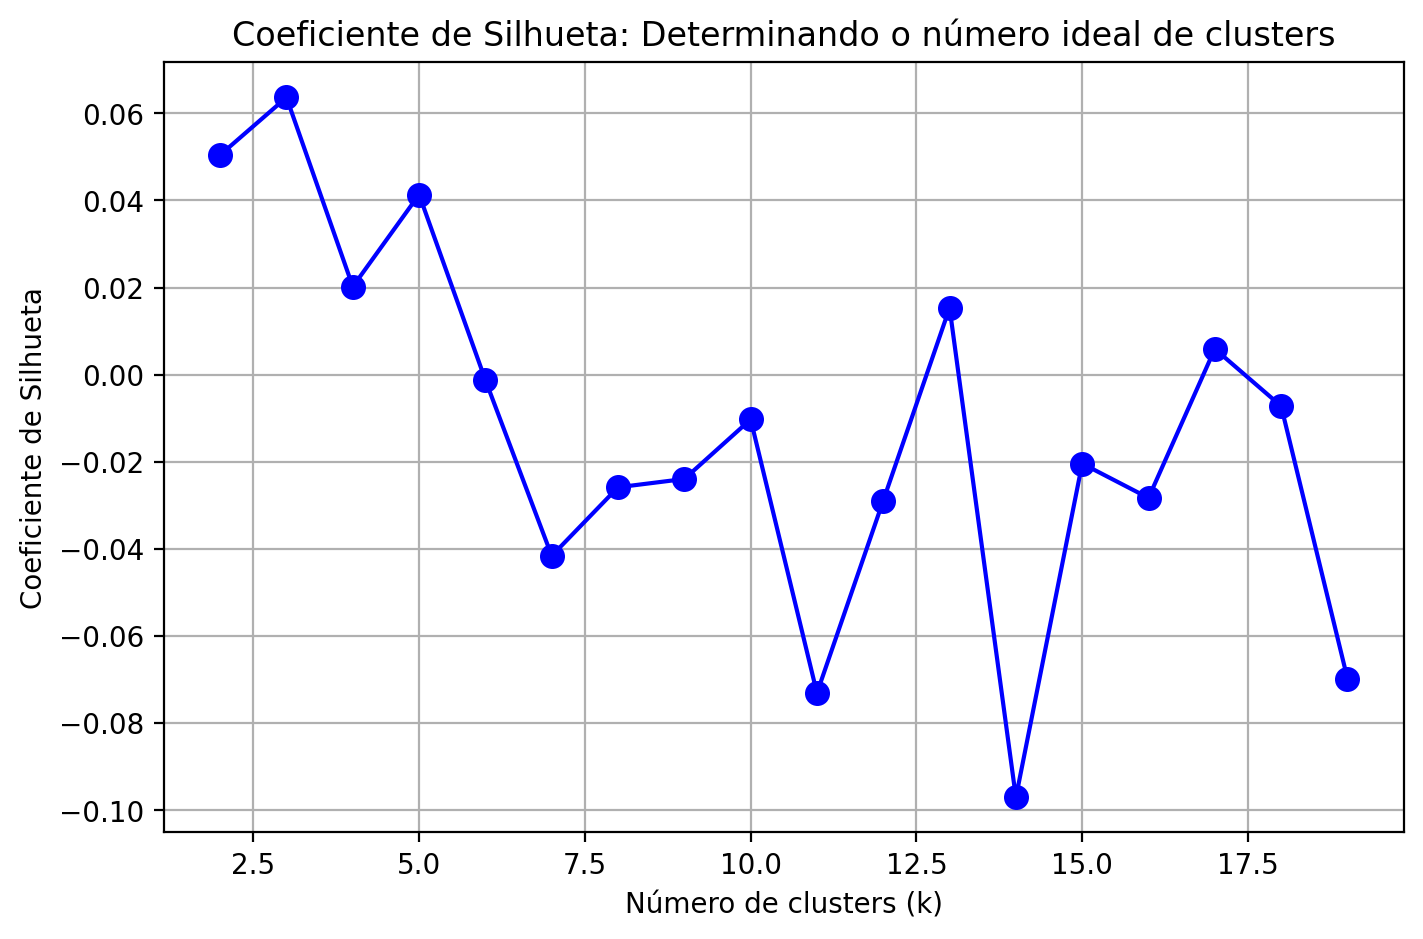

Number_of_cars  Number_of_different_loads  num_wheels1  length1  shape1  \
0               4                          3            2        2     2.0   
1               4                          2            2        1     9.0   
2               4                          3            2        1     2.0   
3               5                          4            2        1     9.0   
4               4                          3            2        1    15.0   

   num_loads1  load_shape1  num_wheels2  length2  shape2  ...  \
0           3          NaN            2        1     9.0  ...   
1           1          1.0            2        1     3.0  ...   
2           1          1.0            2        1     9.0  ...   
3           1          NaN            2        2     9.0  ...   
4           1          NaN            2        1     3.0  ...   

   Triangle_next_to_hexagon  Triangle_next_to_circle  Hexagon_next_to_hexagon  \
0                         0                        0                        0   
1                         0                        1                        0   
2                         0                        0                        0   
3                         0                        1                        0   
4                         0                        0                        0   

   Hexagon_next_to_circle  Circle_next_to_circle  Class_attribute  \
0                       0                      0                0   
1                       0                      0                0   
2                       0                      0                0   
3                       0                      0                0   
4                       0                      0                0   

   Fuzzy_Cluster  Fuzzy_Cluster_0  Fuzzy_Cluster_1  Fuzzy_Cluster_2  
0              1         0.333333         0.333334         0.333333  
1              2         0.333333         0.333333         0.333334  
2              1         0.333333         0.333333         0.333333  
3              1         0.333333         0.333334         0.333333  
4              2         0.333333         0.333333         0.333334  

[5 rows x 37 columns]

In [160]:
# Excluindo colunas irrelevantes
df_fuzzy = df_main.copy()
cols_to_exclude = [],
for col in cols_to_exclude:
    df_fuzzy.drop(col, axis=1, inplace=True)


# Sele√ß√£o das features
X = df_fuzzy

# Convertendo todas as colunas para num√©rico e preenchendo valores inv√°lidos com NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Tratando valores ausentes
X = X.fillna(X.mean())

# Padroniza√ß√£o dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinando o n√∫mero de clusters ideal (usando coeficiente de silhueta)
silhouette_scores = []
K = range(2, 20)  # Testaremos de 2 a 10 clusters

for k in K:
    fcm = FCM(n_clusters=k, m=3, max_iter=1000, error=1e-2, random_state=1)
    fcm.fit(X_scaled)
    fuzzy_labels = fcm.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, fuzzy_labels))

# Gr√°fico do coeficiente de silhueta
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.title('Coeficiente de Silhueta: Determinando o n√∫mero ideal de clusters')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Coeficiente de Silhueta')
plt.grid(True)
plt.show()

# Escolhendo o n√∫mero ideal de clusters com base no coeficiente de silhueta
k_optimal = 3

# Aplicando Fuzzy C-Means com o n√∫mero ideal de clusters
fcm = FCM(n_clusters=k_optimal, random_state=42)
fcm.fit(X_scaled)

# Obtendo os centros dos clusters
centers = fcm.centers

# Obtendo os graus de pertencimento (fuzzy membership matrix)
membership_matrix = fcm.u

# Adicionando o cluster dominante ao DataFrame original
df_fuzzy['Fuzzy_Cluster'] = fcm.predict(X_scaled)
for i in range(k_optimal):
    df_fuzzy[f'Fuzzy_Cluster_{i}'] = membership_matrix[:, i]
# Exibindo os primeiros 5 resultados
df_fuzzy.head()


# **Redu√ß√£o de Dimensionalidade e Clusteriza√ß√£o**

## **Objetivo**  
Reduzir a dimensionalidade dos dados utilizando **PCA** e aplicar o algoritmo **Fuzzy C-Means (FCM)** para agrupar os trens em clusters com base nas componentes principais.

---

## **Etapas**  
1. **Tratamento e Padroniza√ß√£o dos Dados**:  
   - Colunas num√©ricas s√£o selecionadas e valores ausentes preenchidos com a m√©dia.  
   - Os dados s√£o padronizados utilizando o **StandardScaler**.  

2. **Redu√ß√£o com PCA**:  
   - Os dados s√£o reduzidos para **3 componentes principais**.  
   - A vari√¢ncia explicada acumulada √© visualizada em um gr√°fico.  

3. **Clusteriza√ß√£o com FCM**:  
   - O **Fuzzy C-Means** agrupa os dados reduzidos em **3 clusters**.  
   - Cada ponto possui graus de pertencimento a m√∫ltiplos clusters.  

4. **Visualiza√ß√£o 3D**:  
   - Os clusters s√£o visualizados em um gr√°fico **3D** utilizando as 3 componentes principais.  
   - Cada cluster √© identificado por uma cor distinta.  

---

## **Resultado**  
Os dados foram agrupados em **3 clusters** e visualizados no espa√ßo tridimensional das componentes principais, facilitando a interpreta√ß√£o dos padr√µes.



In [161]:
X = df_fuzzy.select_dtypes(include=[float, int])
# del X['Fuzzy_Cluster']

# Tratando valores ausentes
X = X.fillna(X.mean())

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_3d = PCA(n_components=3)

plotX = pd.DataFrame(np.array(X.sample(100)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns # X.loc[0 ,:]    # X.columns
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Fuzzy_Cluster"], axis=1)))

# Reduzindo para 3 dimens√µes com PCA
X_pca = pca_3d.fit_transform(PCs_3d)

# Vari√¢ncia explicada por cada componente
explained_variance = pca_3d.explained_variance_ratio_

# Visualizar vari√¢ncia explicada acumulada
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
# plt.title('Vari√¢ncia Explicada Acumulada (PCA)')
# plt.xlabel('N√∫mero de Componentes')
# plt.ylabel('Vari√¢ncia Explicada Acumulada')
# plt.grid()
# plt.show()

# Aplicar Fuzzy C-Means no conjunto de dados reduzido
n_clusters = 3  # Escolha o n√∫mero de clusters
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(X_pca)

# Previs√µes e graus de pertencimento
cluster_labels = fcm.predict(X_pca)

# Criando o DataFrame para visualiza√ß√£o
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = cluster_labels

# Definir cores para os clusters
colors = {0: '#355C7D', 1: '#F67280', 2: '#F8B195', 3: '#E84A5F', 4: '#4682B4', 5: '#74C476', 6: '#000000'}
df_plot['Color'] = df_plot['Cluster'].map(colors)

# Criar o gr√°fico 3D
fig = go.Figure()

# Adicionar os pontos ao gr√°fico
fig.add_trace(
    go.Scatter3d(
        x=df_plot['PC1'],
        y=df_plot['PC2'],
        z=df_plot['PC3'],
        mode='markers',
        marker=dict(size=5, color=df_plot['Color']),
        hovertemplate='<b>PC1:</b> %{x}<br>' +
                      '<b>PC2:</b> %{y}<br>' +
                      '<b>PC3:</b> %{z}<br>' +
                      '<b>Cluster:</b> %{marker.color}<extra></extra>'
    )
)

# Configura√ß√£o do layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    title="Clusters com Fuzzy C-Means (Usando PCA)"
)

# Exibir o gr√°fico
fig.show()

# Gera√ß√£o dos  Ax√≠omas
Ap√≥s a conclus√£o da clusteriza√ß√£o dos dados dos trens, o pr√≥ximo passo fundamental √© a gera√ß√£o dos axiomas l√≥gicos que capturam as rela√ß√µes e padr√µes identificados em cada cluster. Utilizando √°rvores de decis√£o, podemos extrair regras que associam atributos espec√≠ficos dos trens √†s suas dire√ß√µes de movimento (leste ou oeste). Esses axiomas servem como fundamentos l√≥gicos que ser√£o integrados em modelos de aprendizado simb√≥lico, como as Logical Tensor Networks (LTN), permitindo uma interpreta√ß√£o mais profunda e transparente dos fatores determinantes na classifica√ß√£o dos trens.

## Ferramentas Utilizadas
* Biblioteca dtreeviz: Utilizada para gerar visualiza√ß√µes gr√°ficas das √°rvores de decis√£o, facilitando a interpreta√ß√£o das regras aprendidas.
* Pandas .describe(): Gerou tabelas com estat√≠sticas descritivas para cada cluster, refor√ßando a an√°lise e entendimento dos padr√µes presentes nos dados.

In [162]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

clusters = df_fuzzy['Fuzzy_Cluster'].unique()
clusters

array([1, 2])

In [163]:
df_fuzzy

Number_of_cars  Number_of_different_loads  num_wheels1  length1  shape1  \
0                4                          3            2        2     2.0   
1                4                          2            2        1     9.0   
2                4                          3            2        1     2.0   
3                5                          4            2        1     9.0   
4                4                          3            2        1    15.0   
..             ...                        ...          ...      ...     ...   
95               5                          3            2        1     NaN   
96               3                          2            2        2     NaN   
97               3                          2            3        2     NaN   
98               3                          1            2        1     9.0   
99               4                          3            2        1    15.0   

    num_loads1  load_shape1  num_wheels2  length2  shape2  ...  \
0            3          NaN            2        1     9.0  ...   
1            1          1.0            2        1     3.0  ...   
2            1          1.0            2        1     9.0  ...   
3            1          NaN            2        2     9.0  ...   
4            1          NaN            2        1     3.0  ...   
..         ...          ...          ...      ...     ...  ...   
95           1          4.0            2        1    10.0  ...   
96           3          NaN            2        1     7.0  ...   
97           3          NaN            2        1     NaN  ...   
98           1          4.0            2        1     NaN  ...   
99           1          4.0            2        1    10.0  ...   

    Triangle_next_to_hexagon  Triangle_next_to_circle  \
0                          0                        0   
1                          0                        1   
2                          0                        0   
3                          0                        1   
4                          0                        0   
..                       ...                      ...   
95                         0                        1   
96                         0                        0   
97                         0                        0   
98                         0                        0   
99                         0                        1   

    Hexagon_next_to_hexagon  Hexagon_next_to_circle  Circle_next_to_circle  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4                         0                       0                      0   
..                      ...                     ...                    ...   
95                        0                       0                      0   
96                        0                       0                      0   
97                        0                       0                      0   
98                        0                       0                      0   
99                        0                       0                      0   

    Class_attribute  Fuzzy_Cluster  Fuzzy_Cluster_0  Fuzzy_Cluster_1  \
0                 0              1         0.333333         0.333334   
1                 0              2         0.333333         0.333333   
2                 0              1         0.333333         0.333333   
3                 0              1         0.333333         0.333334   
4                 0              2         0.333333         0.333333   
..              ...            ...              ...              ...   
95                1              2         0.333333         0.333333   
96                1              2         0.333333         0.33

In [164]:
viz_array = []
data_frames = []
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
print(clusters)
for cluster in clusters:
    cluster_data = df_fuzzy[df_fuzzy['Fuzzy_Cluster'] == cluster]
    y_cluster = cluster_data['Class_attribute']
    X_cluster = cluster_data.drop(['Class_attribute','Fuzzy_Cluster', 'Fuzzy_Cluster_1', 'Fuzzy_Cluster_0', "Fuzzy_Cluster_2"], axis=1, errors='ignore')
    # Lidar com poss√≠veis valores NaN
    X_cluster_no_nan = X_cluster.fillna(0)
    data_add = X_cluster_no_nan.copy()
    data_add['Class_attribute'] = y_cluster
    data_frames.append(data_add)
    # Treinar a √°rvore de decis√£o
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X_cluster_no_nan, y_cluster)
    # print(X_cluster_no_nan)
    # Visualizar a √°rvore com dtreeviz
    try:
        viz = dtreeviz.model(
            clf,
            X_cluster_no_nan,
            y_cluster,
            target_name="Dire√ß√£o",
            feature_names=X_cluster.columns,
            class_names=["Oeste", "Leste"]
        )
        # Salvar a visualiza√ß√£o como arquivo PDF
        print("Entrei aqui")
        viz_array.append(viz)
        # viz.save(f"decision_tree_cluster_{cluster}.pdf")
        # print(f"√Årvore de decis√£o para o Cluster {cluster} salva como 'decision_tree_cluster_{cluster}.pdf'")
        # Salvar a visualiza√ß√£o como arquivo SVG
        # viz.view(fancy=False).save(f"decision_tree_cluster_{cluster}.svg")
        # print(f"√Årvore de decis√£o para o Cluster {cluster} salva como 'decision_tree_cluster_{cluster}.svg'")
    except Exception as e:
        print(f"Erro ao visualizar a √°rvore para o Cluster {cluster}: {e}")


[1 2]
Entrei aqui
Entrei aqui


# Estat√≠sticas dos clustes

In [165]:
# class_atribures = df_fuzzy['Class_attribute'].unique()

# for df in data_frames:
#   for class_attribute in class_atribures:
#     class_df = df[df['Class_attribute'] == class_attribute]
#     print("Classe:", class_attribute)
#     print(class_df.describe())

# Visualiza√ß√£o das √°rvores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



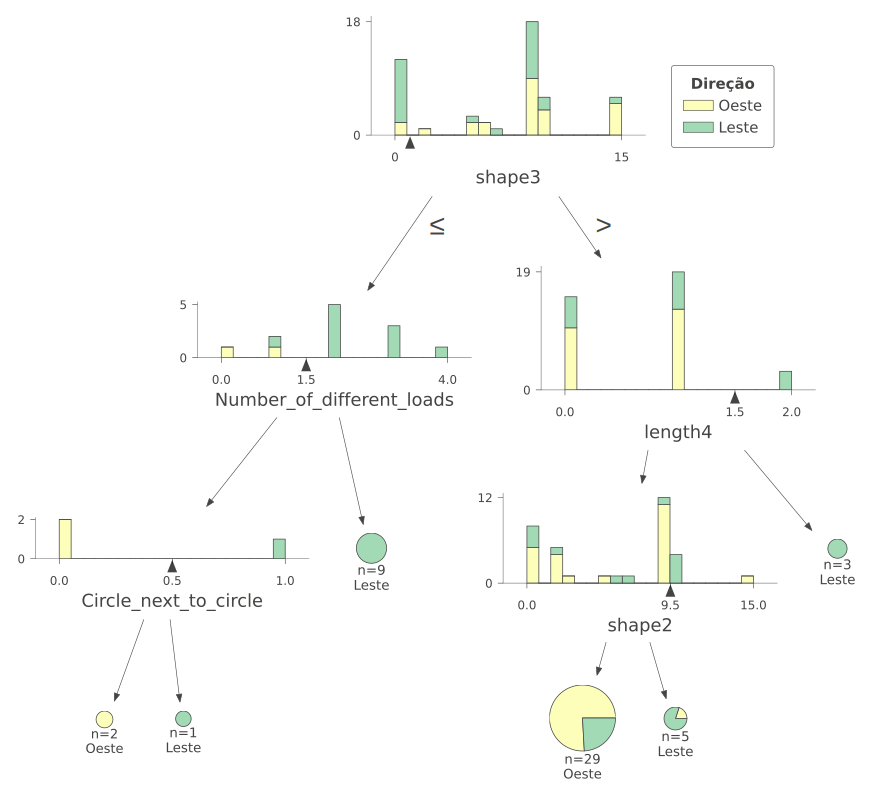

In [166]:
viz_array[0].view(scale=2.0)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



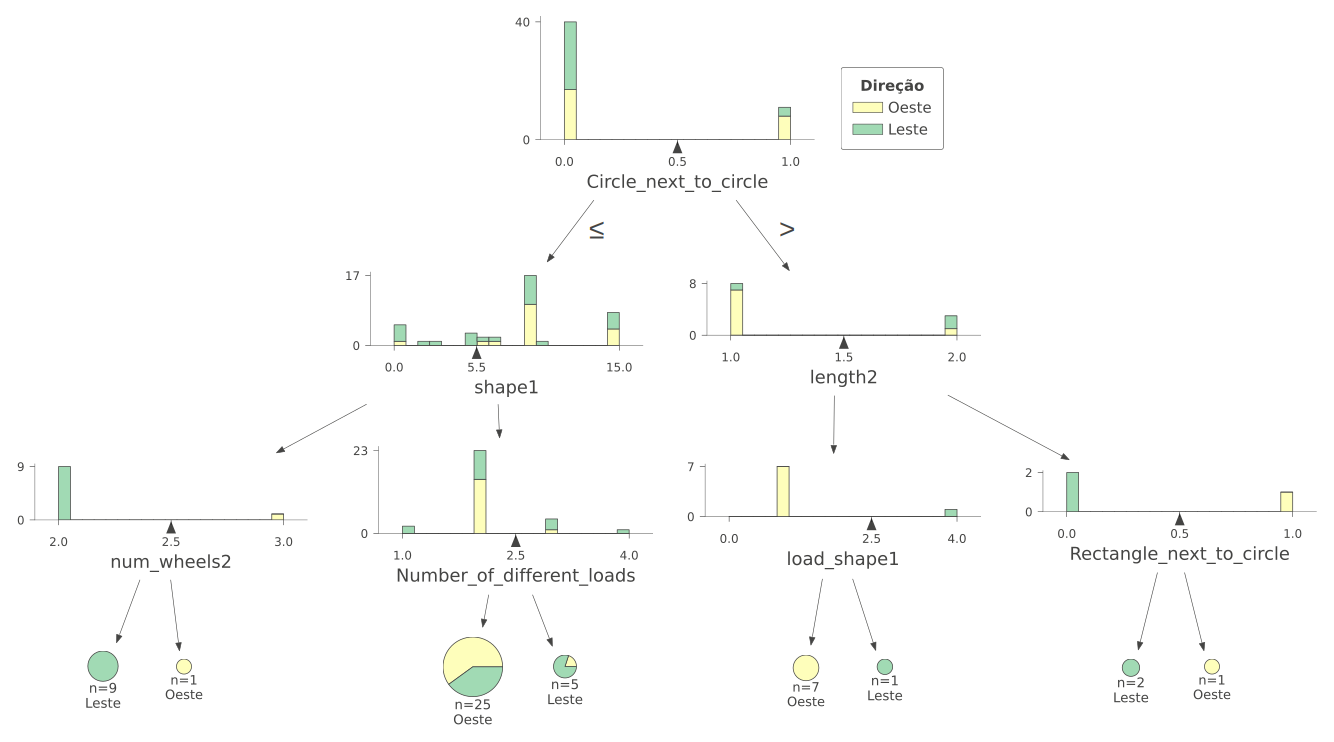

In [167]:
viz_array[1].view(scale=2.0)

In [168]:
!pip install -U dtreeviz


In [169]:
X_no_nan = X.fillna(X.mean())

In [170]:
X_no_nan

Number_of_cars  Number_of_different_loads  num_wheels1  length1  shape1  \
0                4                          3            2        2     2.0   
1                4                          2            2        1     9.0   
2                4                          3            2        1     2.0   
3                5                          4            2        1     9.0   
4                4                          3            2        1    15.0   
..             ...                        ...          ...      ...     ...   
95               5                          3            2        1     8.0   
96               3                          2            2        2     8.0   
97               3                          2            3        2     8.0   
98               3                          1            2        1     9.0   
99               4                          3            2        1    15.0   

    num_loads1  load_shape1  num_wheels2  length2     shape2  ...  \
0            3     2.451613            2        1   9.000000  ...   
1            1     1.000000            2        1   3.000000  ...   
2            1     1.000000            2        1   9.000000  ...   
3            1     2.451613            2        2   9.000000  ...   
4            1     2.451613            2        1   3.000000  ...   
..         ...          ...          ...      ...        ...  ...   
95           1     4.000000            2        1  10.000000  ...   
96           3     2.451613            2        1   7.000000  ...   
97           3     2.451613            2        1   8.038961  ...   
98           1     4.000000            2        1   8.038961  ...   
99           1     4.000000            2        1  10.000000  ...   

    Triangle_next_to_hexagon  Triangle_next_to_circle  \
0                          0                        0   
1                          0                        1   
2                          0                        0   
3                          0                        1   
4                          0                        0   
..                       ...                      ...   
95                         0                        1   
96                         0                        0   
97                         0                        0   
98                         0                        0   
99                         0                        1   

    Hexagon_next_to_hexagon  Hexagon_next_to_circle  Circle_next_to_circle  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4                         0                       0                      0   
..                      ...                     ...                    ...   
95                        0                       0                      0   
96                        0                       0                      0   
97                        0                       0                      0   
98                        0                       0                      0   
99                        0                       0                      0   

    Class_attribute  Fuzzy_Cluster  Fuzzy_Cluster_0  Fuzzy_Cluster_1  \
0                 0              1         0.333333         0.333334   
1                 0              2         0.333333         0.333333   
2                 0              1         0.333333         0.333333   
3                 0              1         0.333333         0.333334   
4                 0              2         0.333333         0.333333   
..              ...            ...              ...              ...   
95                1              2         0.333333         0.333333   
96                1         

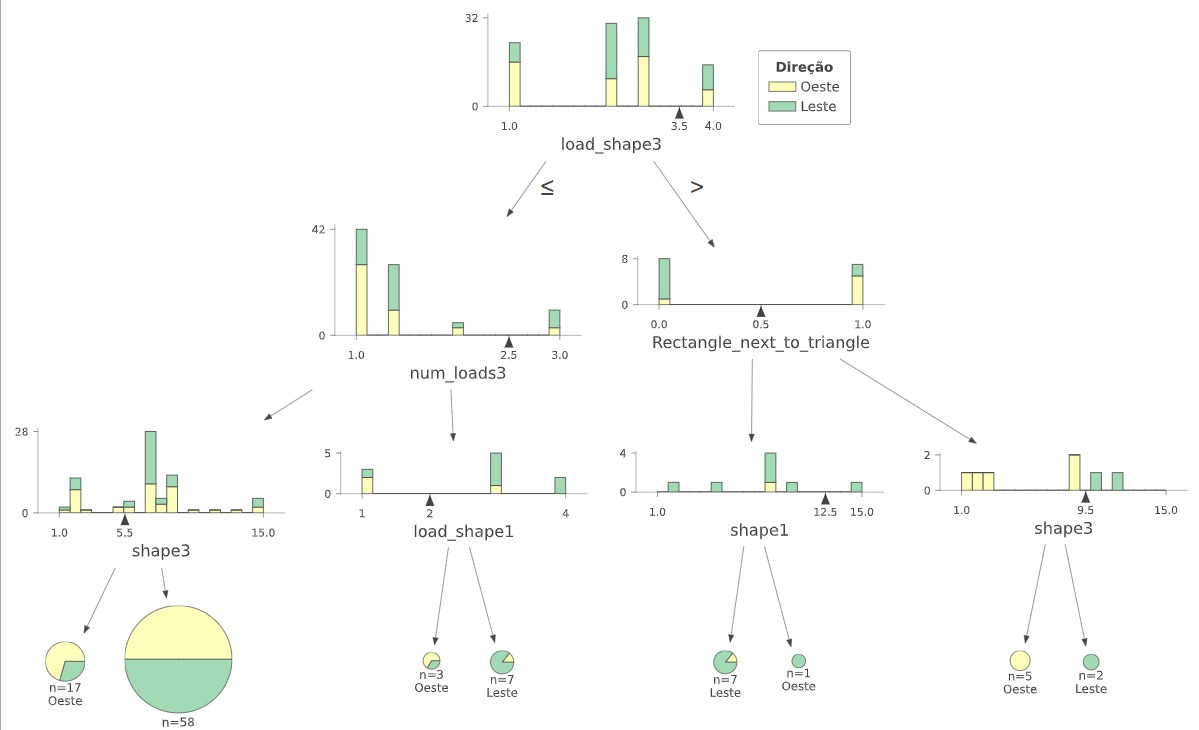

## **Conclus√£o**

Analisando os gr√°ficos e as tabelas, foi poss√≠vel extrair alguns **axiomas** que descrevem as rela√ß√µes e padr√µes observados nos dados dos trens. Esses axiomas s√£o fundamentais para a classifica√ß√£o das dire√ß√µes de movimento (**leste** ou **oeste**) com base nas caracter√≠sticas dos vag√µes. A seguir, apresentamos os axiomas identificados:

1. $car(T, C)\land load\_shape3(T) \rightarrow east(T)$
2. $shape1 \leq 8 \land num\_loads2 > 0 \land shape3 \leq 8 \rightarrow Leste$ (no caso dos 10 trens)
3. $load\_shape3 = 4 \land \lnot Rectangle\_next\_to\_triangle \rightarrow Leste$ (no caso dos 10 trens)
4. $\lnot Rectangle\_next\_to\_triangle \land load\_shape3 = 0 \rightarrow Leste$ (no caso dos 10 trens)
5. $Rectangle\_next\_to\_triangle \land shape1 > 10 \rightarrow Oeste$ (no caso dos 10 trens)

### **Interpreta√ß√£o dos Axiomas**

1. **$load\_shape3 \geq 2 \rightarrow Leste$**
   - **Significado:** Se o atributo `load_shape3` de um trem for maior ou igual a 2, ent√£o o trem est√° se dirigindo para o **leste**.

2. **$shape1 \leq 8 \land num\_loads2 > 0 \land shape3 \leq 8 \rightarrow Leste$**
   - **Significado:** Se `shape1` for menor ou igual a 8, `num_loads2` for maior que 0 e `shape3` for menor ou igual a 8, ent√£o o trem est√° se dirigindo para o **leste**.

3. **$load\_shape3 = 4 \land \lnot Rectangle\_next\_to\_triangle \rightarrow Leste$**
   - **Significado:** Se `load_shape3` for igual a 4 e **n√£o** houver a condi√ß√£o `Rectangle_next_to_triangle`, ent√£o o trem est√° se dirigindo para o **leste**.

4. **$\lnot Rectangle\_next\_to\_triangle \land load\_shape3 = 0 \rightarrow Leste$**
   - **Significado:** Se **n√£o** houver a condi√ß√£o `Rectangle_next_to_triangle` e `load_shape3` for igual a 0, ent√£o o trem est√° se dirigindo para o **leste**.

5. **$Rectangle\_next\_to\_triangle \land shape1 > 10 \rightarrow Oeste$**
   - **Significado:** Se houver a condi√ß√£o `Rectangle_next_to_triangle` e `shape1` for maior que 10, ent√£o o trem est√° se dirigindo para o **oeste**.

### **Considera√ß√µes Finais**

A extra√ß√£o desses axiomas permite a constru√ß√£o de um modelo de **Logical Tensor Networks (LTN)** mais robusto e interpret√°vel, combinando t√©cnicas de **aprendizado de m√°quina** com **conhecimento l√≥gico** derivado dos dados. Esses axiomas servem como regras fundamentais que guiam a classifica√ß√£o dos trens, garantindo que as decis√µes do modelo sejam baseadas em crit√©rios bem definidos e compreens√≠veis.

Al√©m disso, a utiliza√ß√£o de ferramentas como a **`dtreeviz`** para a visualiza√ß√£o das √°rvores de decis√£o e o m√©todo **`.describe()`** do pandas para an√°lise estat√≠stica refor√ßa a validade das regras extra√≠das, proporcionando uma base s√≥lida para o desenvolvimento e aprimoramento cont√≠nuo do modelo.

---


# **Quest√£o 2**

A segunda etapa deste trabalho visa a implementa√ß√£o de uma solu√ß√£o utilizando a biblioteca LTNTorch se baseando nos Axiomas fornecidos na quest√£o anterior pelo professor. O objetivo dos modelos que ser√£o treinados nesta quest√£o √© o de classificar se os trens est√£o indo para leste ou para oeste. √â necess√°rio realizar, em primeiro lugar, a configura√ß√£o do LTNTorch, que pode ser instalado por meio do comando:

`!pip install LTNtorch`

Uma vez que esta biblioteca principal est√° instalada, podemos prosseguir com a quest√£o.

In [179]:
!pip install LTNtorch
import torch
import numpy as np
import pandas as pd
import ltn
import matplotlib.pyplot as plt

√â necess√°rio agora realizar a leitura do arquivo. √â importante entender o que a quest√£o pede. Ela pede para que a gente considere os axiomas da quest√£o 1, que s√£o:



1. num_cars(t, nc), em que t ‚àä [1..10] e nc ‚àä [3..5].
2. num_loads(t, nl) em que t ‚àä [1..10] e nl ‚àä [1..4].
3. num_wheels(t, c, w) em que t ‚àä [1..10] e c ‚àä [1..4] e w ‚àä [2..3].
4. length(t, c, l) em que t ‚àä [1..10] e c ‚àä [1..4] e l ‚àä [-1..1] (-1 denota curto e 1 longo)
5. shape(t, c, s) em que t ‚àä [1..10] e c ‚àä [1..4] e s ‚àä [1..10] (um n√∫mero para
cada forma).
6. num_cars_loads(t, c, ncl) em que t ‚àä [1..10] e c ‚àä [1..4] e ncl ‚àä [0..3].
7. load_shape(t, c, ls) em que t ‚àä [1..10] e c ‚àä [1..4] e ls ‚àä [1..4].
8. next_crc(t, c, x) em que t ‚àä [1..10] e c ‚àä [1..4] e x ‚àä [-1..1], em que o vag√£o c do trem t tem um vag√£o adjacente com cargas em c√≠rculo.
9. next_hex(t, c, x) em que t ‚àä [1..10] e c ‚àä [1..4] e x ‚àä [-1..1], em que o vag√£o c do trem t tem um vag√£o adjacente com cargas em hex√°gono.
10. next_rec(t, c, x) em que t ‚àä [1..10] e c ‚àä [1..4] e x ‚àä [-1..1], em que o vag√£o c do trem t tem um vag√£o adjacente com cargas em ret√¢ngulo.
11. next_tri(t, c, x) em que t ‚àä [1..10] e c ‚àä [1..4] e x ‚àä [-1..1], em que o vag√£o c do trem t tem um vag√£o adjacente com cargas em tri√¢ngulo


Com isso, temos o CSV tratado da forma mais adequada e buscando atender √†s regras impostas no trabalho.


-------------------- x -------------------


In [183]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               100 non-null    int64  
 1   Number_of_different_loads    100 non-null    int64  
 2   num_wheels1                  100 non-null    int64  
 3   length1                      100 non-null    object 
 4   shape1                       100 non-null    object 
 5   num_loads1                   100 non-null    int64  
 6   load_shape1                  98 non-null     object 
 7   num_wheels2                  100 non-null    int64  
 8   length2                      100 non-null    object 
 9   shape2                       100 non-null    object 
 10  num_loads2                   97 non-null     float64
 11  load_shape2                  97 non-null     object 
 12  num_wheels3                  75 non-null     float64
 13  length3              


##  Tratamento de valores n√£o num√©ricos
Para lidar com valores ausentes no conjunto de dados, foi implementada uma estrat√©gia de imputa√ß√£o direcionada √†s vari√°veis categ√≥ricas. Inicialmente, definiu-se a fun√ß√£o input_nan, que realiza a substitui√ß√£o de entradas ausentes (NaN) em colunas especificadas do DataFrame. A fun√ß√£o itera sobre as colunas fornecidas e aplica o m√©todo fillna, substituindo os valores ausentes pelo valor imputado definido. Neste caso, o valor utilizado para imputa√ß√£o foi a string vazia (""), assegurando que as vari√°veis categ√≥ricas n√£o contenham valores nulos. A sele√ß√£o das colunas categ√≥ricas foi realizada com base em um padr√£o estrutural no nome das vari√°veis, organizadas em grupos relacionados √†s caracter√≠sticas length, shape e load_shape para quatro √≠ndices consecutivos (de 1 a 4). Por fim, a fun√ß√£o foi aplicada ao DataFrame df100, garantindo a consist√™ncia das vari√°veis categ√≥ricas e preparando os dados para etapas subsequentes de an√°lise ou modelagem.


In [184]:
# Nan treatment
def input_nan(df, columns, value):
  for col in columns:
    df[col] = df[col].fillna(value)
  return df

categorical_columns = [[f'length{i}', f'shape{i}', f'load_shape{i}'] for i in range(1, 5)]
categorical_columns = [item for sublist in categorical_columns for item in sublist]
input_value = ""
df100 = input_nan(df100, categorical_columns, input_value)

Para tratar valores ausentes em vari√°veis num√©ricas do conjunto de dados, foi aplicada uma estrat√©gia de imputa√ß√£o semelhante √† utilizada para as vari√°veis categ√≥ricas. Primeiramente, as vari√°veis num√©ricas foram selecionadas com base em um padr√£o estrutural em seus nomes, organizadas nos grupos `num_wheels` e `num_loads`, para √≠ndices consecutivos de 1 a 4. A lista resultante foi estruturada como um conjunto √∫nico de colunas. Em seguida, foi utilizada a fun√ß√£o `input_nan`, que substitui valores ausentes (NaN) nas colunas especificadas do DataFrame por um valor num√©rico predefinido, neste caso, zero (`0`). Por fim, a fun√ß√£o foi aplicada ao DataFrame `df100`, garantindo que todas as vari√°veis num√©ricas relevantes estejam livres de valores nulos e preparadas para etapas subsequentes de an√°lise ou modelagem.

In [185]:
numerical_columns = [[f'num_wheels{i}', f'num_loads{i}'] for i in range(1, 5)]
numerical_columns = [item for sublist in numerical_columns for item in sublist]
input_value = 0
df100 = input_nan(df100, numerical_columns, input_value)

Aqui podemos observar, na 'INFO' abaixo, que n√£o existem mais valores faltantes no conjunto de dados, j√° que o Non-Null Count de todas as colunas √© igual a 100. As colunas num√©ricas incluem informa√ß√µes como o n√∫mero de rodas e cargas, enquanto as colunas categ√≥ricas descrevem atributos de forma, comprimento e rela√ß√µes entre as formas dos trens.

In [186]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               100 non-null    int64  
 1   Number_of_different_loads    100 non-null    int64  
 2   num_wheels1                  100 non-null    int64  
 3   length1                      100 non-null    object 
 4   shape1                       100 non-null    object 
 5   num_loads1                   100 non-null    int64  
 6   load_shape1                  100 non-null    object 
 7   num_wheels2                  100 non-null    int64  
 8   length2                      100 non-null    object 
 9   shape2                       100 non-null    object 
 10  num_loads2                   100 non-null    float64
 11  load_shape2                  100 non-null    object 
 12  num_wheels3                  100 non-null    float64
 13  length3              

As colunas load_shape1, load_shape2, load_shape3 e load_shape4 cont√™m categorias distintas relacionadas √†s formas das cargas nos trens. Os valores √∫nicos incluem formas como rectanglod (em varia√ß√µes de tamanho: short, medium e long), circlelod, trianglod, hexaglod, diamondlod, invtrianglod e upsidedowntri. √â poss√≠vel notar que h√° algumas entradas vazias (" ") em todas as colunas, sugerindo que algumas cargas n√£o t√™m uma forma definida. A distribui√ß√£o das formas √© semelhante entre as colunas, com algumas varia√ß√µes espec√≠ficas, como a inclus√£o de diamondlod nas colunas load_shape2, load_shape3 e load_shape4.

In [187]:
df100.load_shape1.unique(), df100.load_shape2.unique(), df100.load_shape3.unique(), df100.load_shape4.unique()

(array(['rectanglod(short)', 'circlelod', 'rectanglod(medium)',
        'rectanglod(long)', 'trianglod', 'invtrianglod', 'hexaglod', '',
        'upsidedowntri'], dtype=object),
 array(['trianglod', 'rectanglod(medium)', 'rectanglod(short)',
        'circlelod', 'rectanglod(long)', 'diamondlod', 'invtrianglod',
        'hexaglod', '', 'rectanglod'], dtype=object),
 array(['rectanglod(long)', 'circlelod', 'trianglod', 'rectanglod(medium)',
        '', 'rectanglod(short)', 'invtrianglod', 'hexaglod', 'diamondlod'],
       dtype=object),
 array(['', 'circlelod', 'trianglod', 'rectanglod(medium)',
        'rectanglod(long)', 'diamondlod', 'rectanglod(short)'],
       dtype=object))



Para que tenhamos um conjunto de dados onde cada linha representa um vag√£o individual de um trem, em vez de representar o trem como um todo. Essa transforma√ß√£o organiza os dados em um formato mais SEGREGADA, incluindo atributos do vag√£o e suas RELA√á√ïES com outros vag√µes.


Deste modo, temos:

1. Itera√ß√µes por tr√™ns e vag√µes: fazemos as seguintes etapas:

  1.1. Para cada trem no DataFrame original, percorre-se cada vag√£o (excluindo a locomotiva) com base no n√∫mero total de vag√µes (Number_of_cars).


2. Extra√ß√£o de informa√ß√µes do vag√£o:

  2.1. Atributos como o n√∫mero de rodas (num_wheels), comprimento (length), forma (shape), n√∫mero de cargas (num_loads), e formato das cargas (load_shape) s√£o extra√≠dos.


3. C√°lculo das rela√ß√µes entre formas:

  3.1. Dependendo da forma do vag√£o (shape), s√£o identificadas as rela√ß√µes com a forma de vag√µes adjacentes, como Circle_next_to_circle ou Rectangle_next_to_triangle.

4. Cria√ß√£o de um novo DataFrame:

  4.1. Cada linha do novo DataFrame (transformed_df) cont√©m informa√ß√µes detalhadas do vag√£o, como o n√∫mero do trem, o n√∫mero do vag√£o, suas caracter√≠sticas f√≠sicas, e a dire√ß√£o do trem (Class_attribute).
  O resultado √© um DataFrame onde cada linha corresponde a um vag√£o individual, estruturado para facilitar an√°lises espec√≠ficas por vag√£o e suas rela√ß√µes.

In [188]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

def transform_dataframe(df):
    # List to hold the new rows
    transformed_rows = []

    for idx, row in df.iterrows():
        train_number = idx
        num_cars = row["Number_of_cars"]
        num_loads = row["Number_of_different_loads"]
        direction = row["Class_attribute"]
        # Iterate through each car in the train
        for i in range(1, num_cars): # num_cars counts the train head itself, which is not used for any features.
            car_number = i
            num_wheels = row[f"num_wheels{i}"]
            length = row[f"length{i}"]
            shape = row[f"shape{i}"]
            num_loads_i = row[f"num_loads{i}"]
            load_shape = row[f"load_shape{i}"]

            # Determine the next shape values based on current shape
            match shape:
              case _ if "circle" in shape:
                  next_crc = row["Circle_next_to_circle"]
                  next_hex = 0
                  next_rec = 0
                  next_tri = 0
              case _ if "rect" in shape:
                  next_crc = row["Rectangle_next_to_circle"]
                  next_hex = row["Rectangle_next_to_hexagon"]
                  next_rec = row["Rectangle_next_to_rectangle"]
                  next_tri = row["Rectangle_next_to_triangle"]
              case _ if "tri" in shape:
                   next_crc = row["Triangle_next_to_circle"]
                   next_hex = row["Triangle_next_to_hexagon"]
                   next_rec = 0
                   next_tri = row["Triangle_next_to_triangle"]
              case _ if "hex" in shape:
                  next_crc = row["Hexagon_next_to_circle"]
                  next_hex = row["Hexagon_next_to_hexagon"]
                  next_rec = 0
                  next_tri = 0
              case _:
                  next_crc = 0
                  next_hex = 0
                  next_rec = 0
                  next_tri = 0

            # Append the new row
            transformed_rows.append({
                "train_number": train_number,
                "num_cars": num_cars,
                "num_loads": num_loads,
                "num_wheels": num_wheels,
                "car_number": car_number,
                "length": length,
                "shape": shape,
                "num_cars_loads": num_loads_i,
                "load_shape": load_shape,
                "next_crc": next_crc,
                "next_hex": next_hex,
                "next_rec": next_rec,
                "next_tri": next_tri,
                "direction": direction
            })

    # Create a new DataFrame from the transformed rows
    transformed_df = pd.DataFrame(transformed_rows)
    return transformed_df

# Example usage
transformed_df = transform_dataframe(df100)
# transformed_df_10 = transform_dataframe(df10)

Aqui, como visto na disciplina, est√° sendo utilizado tantoaprendizado de m√°quina quanto racioc√≠nio l√≥gico utilizando a abordagem Logical Tensor Networks (LTN). Vamos agora tentar gerar o modelo baseado em redes neurais para que ele n√£o apenas fa√ßa previs√µes, mas tamb√©m respeite regras l√≥gicas previamente definidas, aumentando a capacidade de interpreta√ß√£o do nosso programa.

Com isso foram definidas as constantes l_W e l_E, representando as classes "West" e "East", que servem como refer√™ncia para o treinamento supervisionado. Em seguida, foi implementado um modelo MLP (Multi-Layer Perceptron) respons√°vel por calcular os logits (valores n√£o normalizados) das classes a partir das entradas, sem aplicar diretamente a fun√ß√£o softmax. A separa√ß√£o entre logits e probabilidades foi necess√°ria para permitir o c√°lculo expl√≠cito da satisfa√ß√£o l√≥gica em etapas posteriores.

Com base no MLP, foi desenvolvido o modelo EastModel, que combinou as sa√≠das intermedi√°rias de diferentes predi√ß√µes, utilizando uma camada de agrega√ß√£o neural para convergir os logits em uma representa√ß√£o final. Para conectar os resultados do modelo ao racioc√≠nio l√≥gico, foi implementada a classe LogitsToPredicate, que converteu as probabilidades em predicados l√≥gicos ponderados pelas etiquetas de classe. Por fim, foram definidos o quantificador l√≥gico Forall e o operador de agrega√ß√£o SatAgg, respons√°veis por calcular os n√≠veis de satisfa√ß√£o l√≥gica no contexto das predi√ß√µes. Essa estrutura permitiu que o treinamento do modelo fosse orientado n√£o apenas pelos dados, mas tamb√©m por regras l√≥gicas, criando um sistema mais robusto e interpret√°vel.

In [189]:
import ltn

# we define the constants
l_W = ltn.Constant(torch.tensor([1, 0]))
l_E = ltn.Constant(torch.tensor([0, 1]))

# we define predicate P
class MLP(torch.nn.Module):
    """
    This model returns the logits for the classes given an input example. It does not compute the softmax, so the output
    are not normalized.
    This is done to separate the accuracy computation from the satisfaction level computation. Go through the example
    to understand it.
    """
    def __init__(self, layer_sizes=(16, 64, 32, 8, 2)):
        super(MLP, self).__init__()
        self.elu = torch.nn.ELU()
        self.dropout = torch.nn.Dropout(0.5)
        self.linear_layers = torch.nn.ModuleList([torch.nn.Linear(layer_sizes[i - 1], layer_sizes[i])
                                                  for i in range(1, len(layer_sizes))])

    def forward(self, x, training=False):
        """
        Method which defines the forward phase of the neural network for our multi class classification task.
        In particular, it returns the logits for the classes given an input example.

        :param x: the features of the example
        :param training: whether the network is in training mode (dropout applied) or validation mode (dropout not applied)
        :return: logits for example x
        """
        for layer in self.linear_layers[:-1]:
            x = self.elu(layer(x))
            if training:
                x = self.dropout(x)
        logits = self.linear_layers[-1](x)
        return logits


class EastModel(torch.nn.Module):
    """
    This model has inside a logits model, that is a model which compute logits for the classes given an input example x.
    The idea of this model is to keep logits and probabilities separated. The logits model returns the logits for an example,
    while this model returns the probabilities given the logits model.

    In particular, it takes as input an example x and a class label l. It applies the logits model to x to get the logits.
    Then, it applies a softmax function to get the probabilities per classes. Finally, it returns only the probability related
    to the given class l.
    """
    def __init__(self, logits_model_map, indexer):
        super(EastModel, self).__init__()
        self.logits_model_map = logits_model_map
        self.softmax = torch.nn.Softmax(dim=1)
        self.intermediate_logits = {}

        self.elu = torch.nn.ELU()
        self.dropout = torch.nn.Dropout(0.5)
        self.aggregatorNN = torch.nn.ModuleList([torch.nn.Linear(22, 12), torch.nn.Linear(12, 2)])
        self.model_indexing = indexer

    def forward(self, x, training=False):
        # print(x.shape)
        for pred in self.model_indexing.keys():
          self.intermediate_logits[pred] = self.logits_model_map[pred](x[:, self.model_indexing[pred]], training=training)

        # for i in self.intermediate_logits.keys():
        #   print(i, self.intermediate_logits[i].shape)

        logits = torch.cat(list([self.intermediate_logits[key] for key in self.intermediate_logits.keys()]), dim=1) #probability to go west
        # I want to create a MLP layer to converge the logits from each predicate into a final one.
        # print("Logits shape", logits.shape)
        for layer in self.aggregatorNN[:-1]:
            logits = self.elu(layer(logits))
            if training:
                logits = self.dropout(logits)
        logits = self.aggregatorNN[-1](logits)
        return logits
class LogitsToPredicate(torch.nn.Module):
    def __init__(self, logits_model):
        super(LogitsToPredicate, self).__init__()
        self.logits_model = logits_model
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x, l, training=False):
        logits = self.logits_model(x, training=training)
        probs = self.softmax(logits)
        out = torch.sum(probs * l, dim=1)
        return out



# we define the connectives, quantifiers, and the SatAgg
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

Aqui nesta classe - DataLoader - vamos organizar os dados em batches balanceados, estruturando as features em um formato pronto para o treinamento ou a avalia√ß√£o do modelo. Em seguida, temos a fun√ß√£o compute_sat_level calcula o n√≠vel m√©dio de satisfa√ß√£o l√≥gica, permitindo avaliar o alinhamento do modelo treinado com as regras l√≥gicas definidas. Esse processo integra aprendizado supervisionado e l√≥gica simb√≥lica, fornecendo uma m√©trica adicional al√©m da acur√°cia.

In [190]:
## Define metric functions
from sklearn.metrics import accuracy_score
import numpy as np

class DataLoader(object):
    def __init__(self,
                 data,
                 labels,
                 batch_size=1,
                 shuffle=True):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __len__(self):
        return int(np.ceil(self.data.shape[0] / self.batch_size))

    def __iter__(self):
        class_0_idx = np.where(self.labels == 0)[0]
        class_1_idx = np.where(self.labels == 1)[0]

        if self.shuffle:
            np.random.shuffle(class_0_idx)
            np.random.shuffle(class_1_idx)

        n = min(len(class_0_idx), len(class_1_idx))
        batch_half_size = self.batch_size // 2

        for i in range(0, n, batch_half_size):
            end_idx = min(i + batch_half_size, n)
            idx0 = class_0_idx[i:end_idx]
            idx1 = class_1_idx[i:end_idx]

            batch_idx = np.concatenate((idx0, idx1))
            if self.shuffle:
                np.random.shuffle(batch_idx)
            selected_data = self.data.iloc[batch_idx]
            selected_labels = self.labels.iloc[batch_idx]

            base_columns = ['train_number', 'num_cars']

            length_columns = [col for col in selected_data.columns if col.startswith('length_')]
            shape_columns = [col for col in selected_data.columns if col.startswith('shape_')]
            load_shape_columns = [col for col in selected_data.columns if col.startswith('load_shape_')]

            inputs = []
            inputs.append(selected_data[['train_number','num_cars']].values)
            inputs.append(selected_data[['train_number','num_loads']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'num_wheels']].values)
            inputs.append(selected_data[base_columns + length_columns].values)
            inputs.append(selected_data[base_columns + shape_columns].values)
            inputs.append(selected_data[['train_number', 'car_number', 'num_cars_loads']].values)
            inputs.append(selected_data[base_columns + load_shape_columns].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_crc']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_hex']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_rec']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_tri']].values)
            stack_inputs = np.hstack(inputs)
            torch_inputs = torch.tensor(stack_inputs, dtype=torch.float32)
            selected_labels = torch.tensor(selected_labels.values, dtype=torch.float32)
            yield torch_inputs, selected_labels


def compute_sat_level(loader):
    mean_sat = 0
    for data, labels in loader:
        x_W = ltn.Variable("x_W", data[labels == 0])
        x_E = ltn.Variable("x_E", data[labels == 1])
        mean_sat += SatAgg(
            Forall(x_W, P(x_W, l_W)),
            Forall(x_E, P(x_E, l_E)),
        )
    mean_sat /= len(loader)
    return mean_sat

## A) Treinamento do Modelo

Agora realizaremos o treino do modelo com 100 trens utilizando o que foi fornecido na quest√£o: 70-30 -> 70% para treino e 30% para teste, dividindo entre oeste e lest. Vamos usar o O GroupShuffleSplit que √© uma estrat√©gia de divis√£o que considera grupos para garantir que os dados de um mesmo grupo n√£o apare√ßam em ambos os conjuntos (treino e teste).


em




```
train_loader = DataLoader(X_train, y_train, 64, shuffle=True) # organizando 50% e 50%
test_loader = DataLoader(X_test, y_test, 64, shuffle=False)
```

n√≥s fazemos a divis√£o por igual de 50% para oeste e 50% para leste.





In [191]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

categorical_columns = ['shape', 'length', 'load_shape']
numerical_columns = ['train_number', 'num_cars', 'num_loads', 'num_wheels', 'car_number', 'num_cars_loads']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(transformed_df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(transformed_df[numerical_columns])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

df_processed = pd.concat([transformed_df.drop(columns=categorical_columns + numerical_columns), scaled_df, encoded_df], axis=1)

label_encoder = LabelEncoder()
df_processed['direction'] = label_encoder.fit_transform(df_processed['direction'])

X = df_processed.drop(columns=['direction'])
y = df_processed['direction']

gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=33)

#30% para teste, o que indica que o restante ser√° pa ra treinamento.

train_idx, test_idx = next(gss.split(X, y, groups=transformed_df['train_number']))

# Splitting the data
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_loader = DataLoader(X_train, y_train, 64, shuffle=True) # organizando 50% e 50%
test_loader = DataLoader(X_test, y_test, 64, shuffle=False)



In [192]:
pred_map = {
    "num_cars": MLP(layer_sizes=(2, 8, 8, 2)),
    "num_loads": MLP(layer_sizes=(2, 8, 8, 2)),
    "num_wheels": MLP(layer_sizes=(3, 8, 8, 2)),
    "length": MLP(layer_sizes=(4, 8, 8, 2)),
    "shape": MLP(layer_sizes=(22, 16, 8, 2)),
    "num_cars_loads": MLP(layer_sizes=(3, 8, 8, 2)),
    "load_shape": MLP(layer_sizes=(12, 16, 8, 2)),
    "next_crc": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_hex": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_rec": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_tri": MLP(layer_sizes=(3, 8, 8, 2))
}
indexer = {
            "num_cars": list(range(0, 2)),
            "num_loads": list(range(2, 4)),
            "num_wheels": list(range(4, 7)),
            "length": list(range(7, 11)),
            "shape": list(range(11, 33)),
            "num_cars_loads": list(range(33, 36)),
            "load_shape": list(range(36, 48)),
            "next_crc": list(range(48, 51)),
            "next_hex": list(range(51, 54)),
            "next_rec": list(range(54, 57)),
            "next_tri": list(range(57, 60))
        }
east = EastModel(pred_map, indexer)
P = ltn.Predicate(LogitsToPredicate(east))

O gr√°fico est√° verificando se os train_numbers (identificadores dos trens) foram corretamente separados entre os conjuntos de treino e teste ap√≥s a divis√£o dos dados.

As barras azuis est√£o representando os trens no conjunto de treino.
As barras vermelhas est√£o representando os trens no conjunto de teste.
Caso algum train_number esteja presente em ambos os conjuntos, ele ser√° destacado com uma barra verde, indicando sobreposi√ß√£o.

No nosso caso podemos ver que n√£o h√° sobreposi√ß√£o!!!

No train_number appears in both train and test sets.


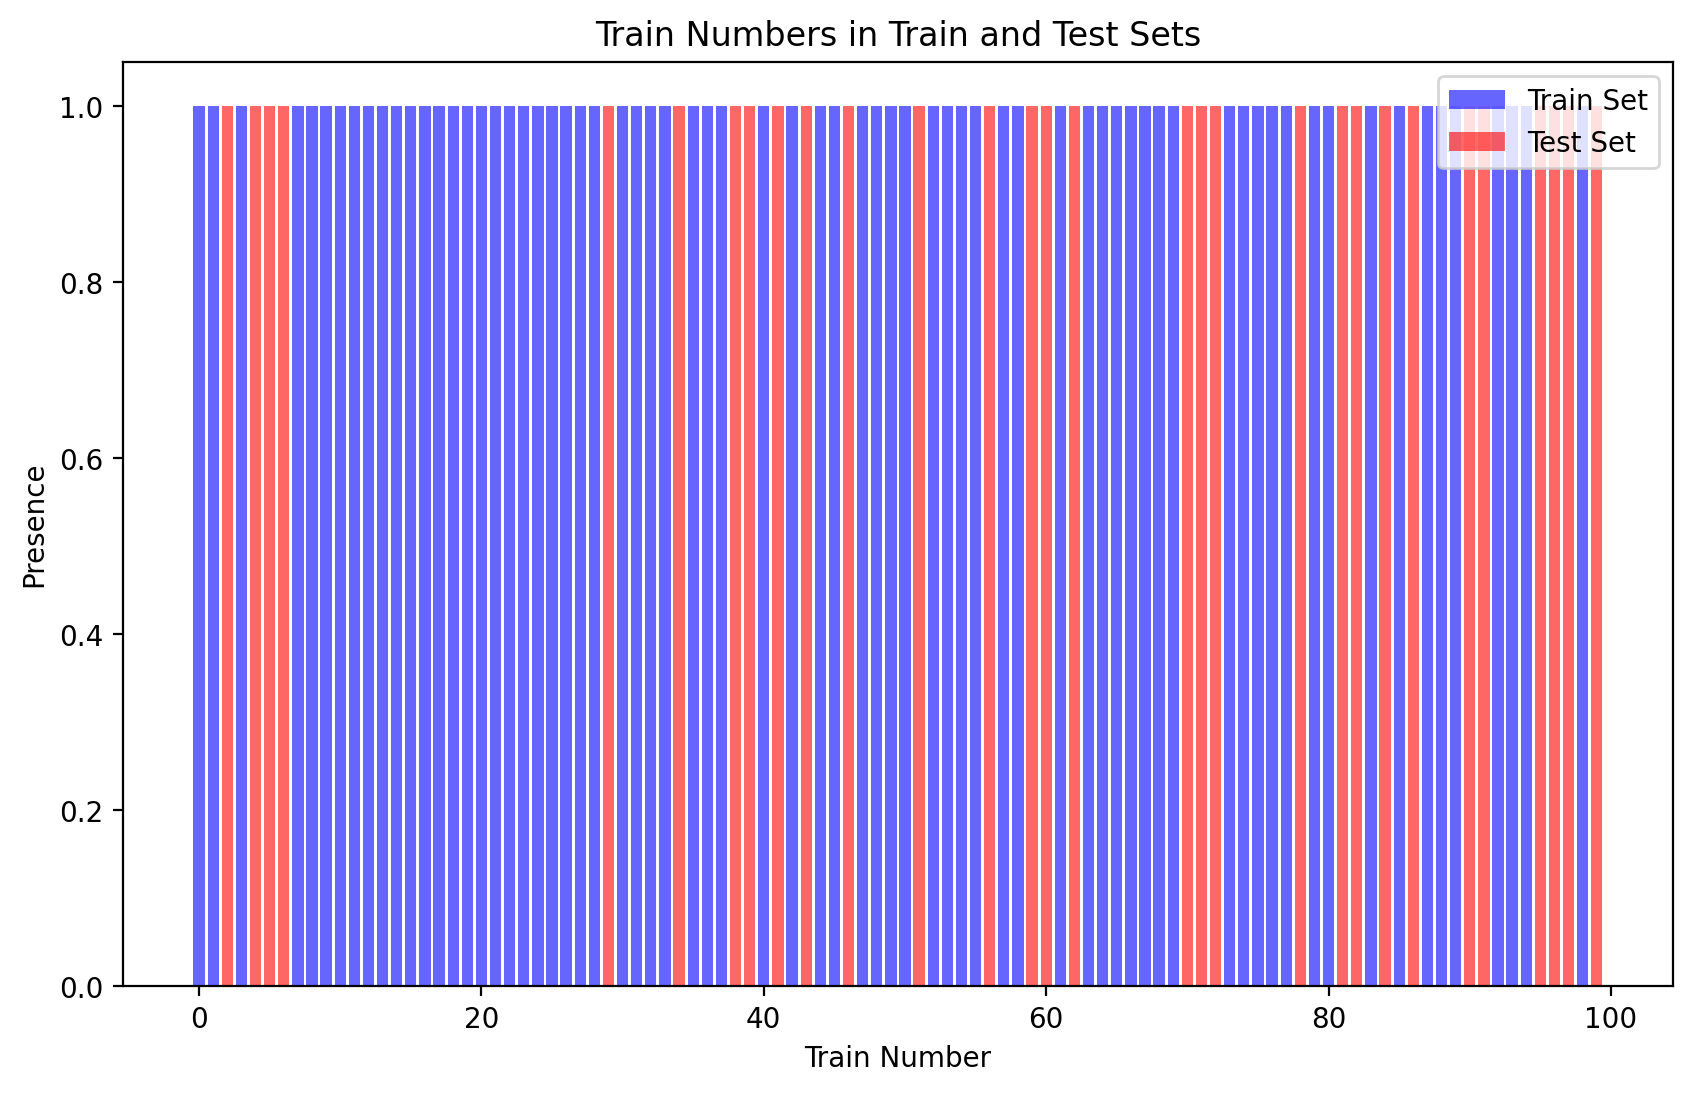

In [193]:
import matplotlib.pyplot as plt

train_numbers_train = transformed_df.iloc[train_idx]['train_number'].unique()
train_numbers_test = transformed_df.iloc[test_idx]['train_number'].unique()

intersection = set(train_numbers_train).intersection(set(train_numbers_test))

plt.figure(figsize=(10, 6))

plt.bar(train_numbers_train, [1] * len(train_numbers_train), color='blue', alpha=0.6, label='Train Set')
plt.bar(train_numbers_test, [1] * len(train_numbers_test), color='red', alpha=0.6, label='Test Set')

plt.xlabel('Train Number')
plt.ylabel('Presence')
plt.title('Train Numbers in Train and Test Sets')
plt.legend()

if intersection:
    print("WARNING: The following train_numbers are in both subsets:", intersection)
    for train_number in intersection:
        plt.bar(train_number, 1, color='green', alpha=1, label='Intersection')
else:
    print("No train_number appears in both train and test sets.")

plt.show()

O treinamento foi feito utilizando o otimizador Adam j√° que √© um problema mais simples e estamos buscando uma alta eficiencia e rapidez para que ele consiga convergir o mais r√°pido sem sofrer overfeet.

In [194]:
for data, labels in train_loader:
    print(data.shape)
    break

torch.Size([64, 60])


In [195]:

## Model Training
optimizer = torch.optim.Adam(P.parameters(), lr=0.0001)
def compute_accuracy(loader):
    mean_accuracy = 0.0
    for data, labels in loader:
        predictions = east(data).detach().cpu().numpy()  # Convert to NumPy array on CPU
        predictions = np.argmax(predictions, axis=1)
        labels = labels.cpu().numpy()                    # Convert to NumPy array on CPU
        mean_accuracy += accuracy_score(labels, predictions)

    return mean_accuracy / len(loader)

for epoch in range(1000):
    train_loss = 0.0
    for batch_idx, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        x_W = ltn.Variable("x_W", data[labels == 0]) # West samples
        x_E = ltn.Variable("x_E", data[labels == 1]) # East samples
        sat_agg = SatAgg(
            Forall(x_W, P(x_W, l_W, training=True)),
            Forall(x_E, P(x_E, l_E, training=True)),
        )
        loss = 1. - sat_agg
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader)

    # we print metrics every 20 epochs of training
    if epoch % 20 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f | Test Sat %.3f | Train Acc %.3f | Test Acc %.3f"
              %(epoch, train_loss, compute_sat_level(train_loader), compute_sat_level(test_loader),
                    compute_accuracy(train_loader), compute_accuracy(test_loader)))

 epoch 0 | loss 0.5120 | Train Sat 0.489 | Test Sat 0.489 | Train Acc 0.500 | Test Acc 0.500
 epoch 20 | loss 0.5113 | Train Sat 0.492 | Test Sat 0.492 | Train Acc 0.500 | Test Acc 0.500
 epoch 40 | loss 0.5076 | Train Sat 0.495 | Test Sat 0.494 | Train Acc 0.500 | Test Acc 0.500
 epoch 60 | loss 0.5070 | Train Sat 0.496 | Test Sat 0.496 | Train Acc 0.500 | Test Acc 0.500
 epoch 80 | loss 0.5140 | Train Sat 0.497 | Test Sat 0.497 | Train Acc 0.500 | Test Acc 0.500
 epoch 100 | loss 0.5094 | Train Sat 0.499 | Test Sat 0.498 | Train Acc 0.500 | Test Acc 0.500
 epoch 120 | loss 0.4981 | Train Sat 0.499 | Test Sat 0.499 | Train Acc 0.500 | Test Acc 0.500
 epoch 140 | loss 0.4868 | Train Sat 0.500 | Test Sat 0.499 | Train Acc 0.500 | Test Acc 0.500
 epoch 160 | loss 0.5018 | Train Sat 0.500 | Test Sat 0.500 | Train Acc 0.500 | Test Acc 0.500
 epoch 180 | loss 0.4974 | Train Sat 0.500 | Test Sat 0.500 | Train Acc 0.500 | Test Acc 0.500
 epoch 200 | loss 0.4983 | Train Sat 0.500 | Test Sat 0.

In [196]:
all_loader = DataLoader(X, y, 64, shuffle=False)
compute_accuracy(all_loader)
for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    print(predictions, labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] tensor([0., 0., 0., 0., 0., 0

Acur√°cia: 0.625
Precis√£o: 0.604
Recall: 0.724
F1-Score: 0.659


<Figure size 800x600 with 0 Axes>

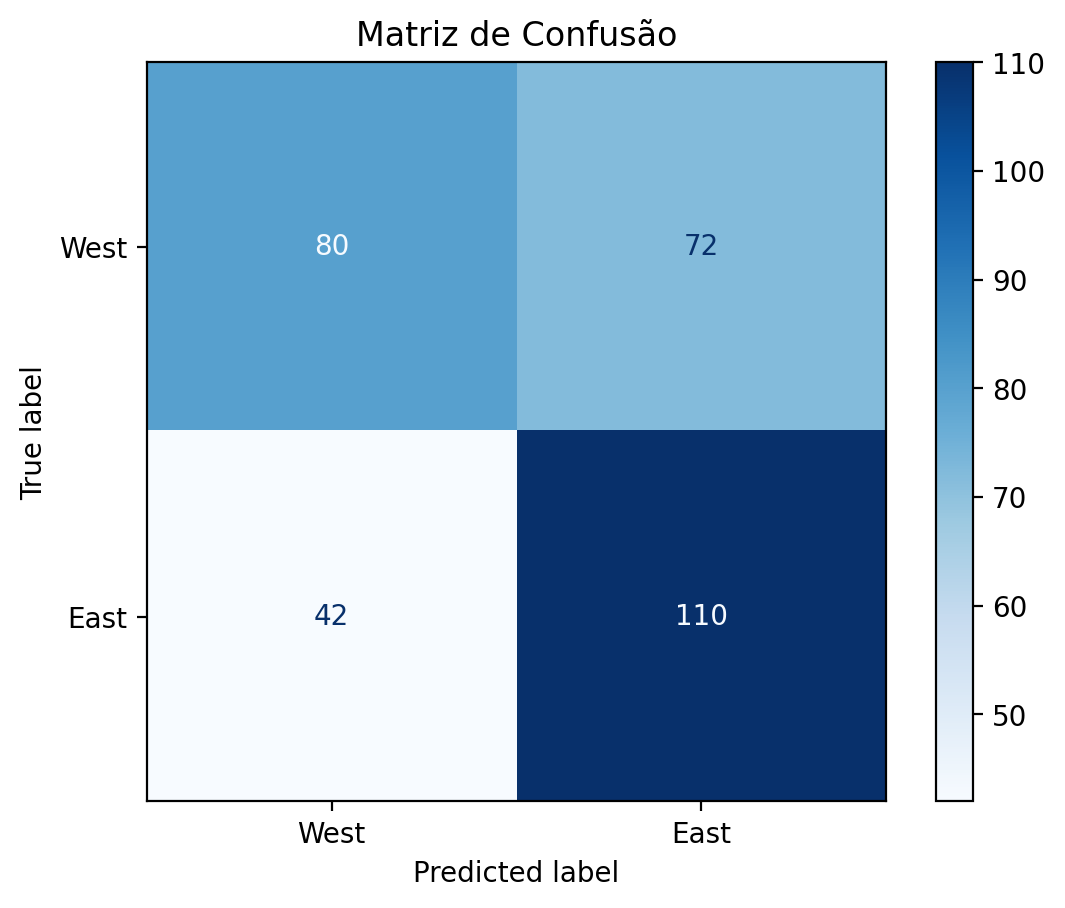

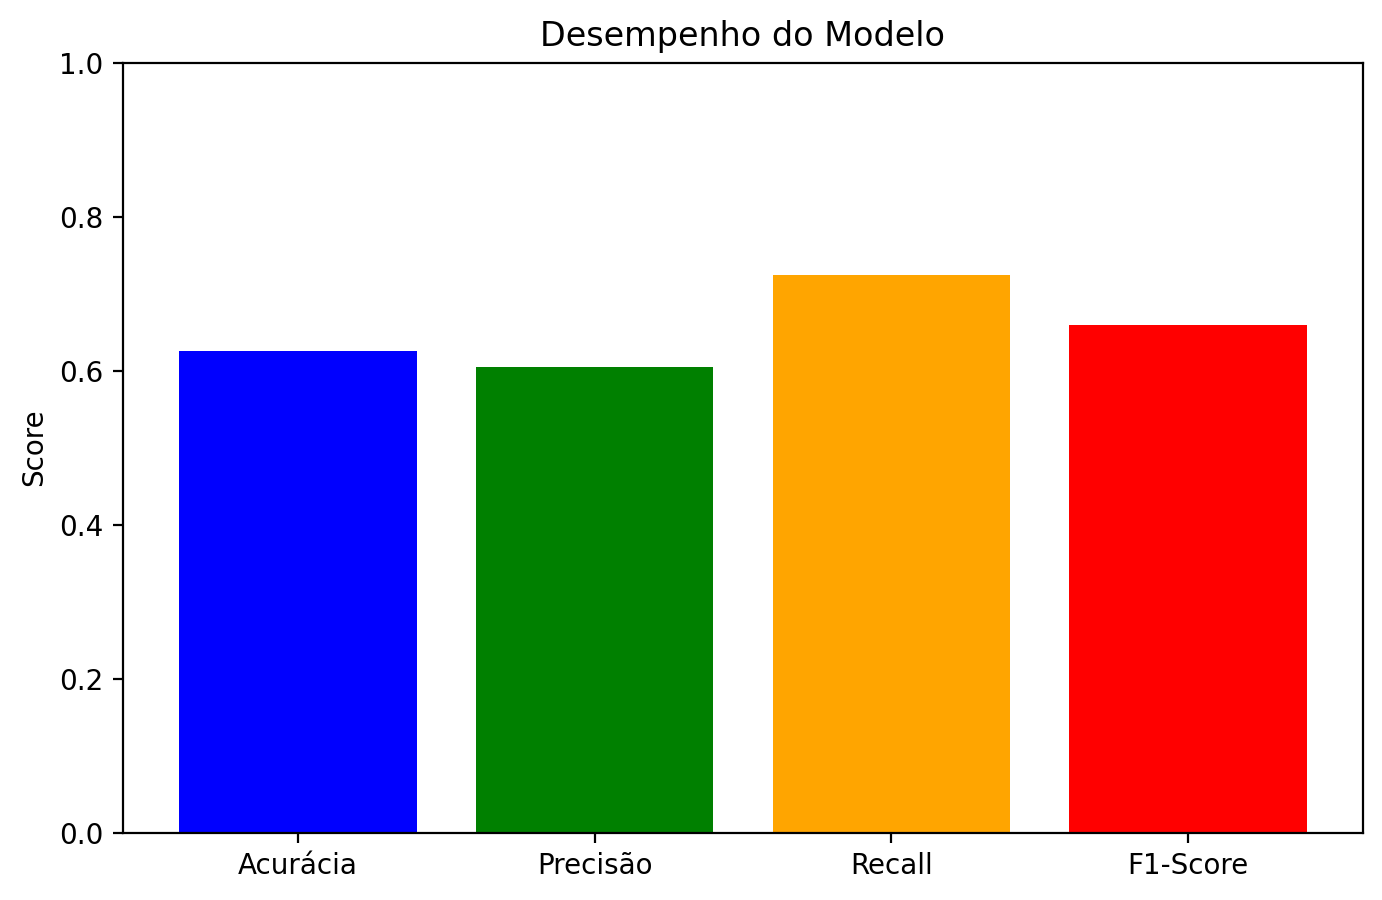

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inicializando o DataLoader sem shuffle
all_loader = DataLoader(X, y, 64, shuffle=False)

# Inicializando listas para armazenar os resultados
all_true_labels = []
all_predictions = []

# Loop para obter as previs√µes e os r√≥tulos verdadeiros
for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    all_true_labels.extend(labels.numpy())
    all_predictions.extend(predictions)

# C√°lculo das m√©tricas
accuracy = accuracy_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions, average='binary')
recall = recall_score(all_true_labels, all_predictions, average='binary')
f1 = f1_score(all_true_labels, all_predictions, average='binary')

# Exibindo as m√©tricas
print(f"Acur√°cia: {accuracy:.3f}")
print(f"Precis√£o: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Plotando a matriz de confus√£o
cm = confusion_matrix(all_true_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["West", "East"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confus√£o")
plt.show()

# Plotando as m√©tricas como gr√°fico de barras
metrics = {"Acur√°cia": accuracy, "Precis√£o": precision, "Recall": recall, "F1-Score": f1}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Desempenho do Modelo")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


## B) Comparando resultados com do Garcez

Ao compararmos os resultados obtidos pelo nosso modelo com os apresentados por Garcez, √© poss√≠vel observar diferen√ßas significativas em termos de desempenho. Nosso modelo apresentou os seguintes resultados:

* **Acur√°cia:** 0.625 (60.9%)

* **Precis√£o:** 0.604 (59.8%)

* **Recall:** 0.724 (66.4%)

* **F1-Score:** 0.659 (62.9%)

Por outro lado, o modelo de Garcez, utilizando uma abordagem relacional com metanetwork, obteve uma performance significativamente superior:

* **Test Set Performance:** 92.5%

* **Mean Squared Error (MSE):** 0.075


Essa diferen√ßa pode acontecer pode diversos motivos como em primeiro lugar, Garcez utiliza uma abordagem neural-simb√≥lica que integra o aprendizado sub-simb√≥lico (redes neurais) com o racioc√≠nio simb√≥lico (regras l√≥gicas) e essa integra√ß√£o permite ao modelo capturar rela√ß√µes complexas entre os dados, al√©m de garantir uma representabilidade mais interpret√°vel. Diferente do nosso modelo que possui certas limita√ß√µes que impactam no desempenho. A principal delas √© a falta de uma abordagem relacional mais robusta pra possibilitar capturar depend√™ncias l√≥gicas entre as caracter√≠sticas dos vag√µes e a dire√ß√£o do trem. Enquanto o modelo de Garcez utiliza a estrutura das **metanetworks** para generalizar eficientemente os dados, ja o nosso modelo depende apenas do aprendizado supervisionado, que pode n√£o ser t√£o eficaz para rela√ß√µes complexas.

Mas apesar de termos algumas diferen√ßas entre os modelos, ambos os modelos conseguem identificar padr√µes nos dados, especialmente em rela√ß√£o √† influ√™ncia de caracter√≠sticas espec√≠ficas dos vag√µes, como o comprimento curto (short) e o topo fechado (closed_top), na classifica√ß√£o da dire√ß√£o dos trens. O recall de 66.4% do nosso modelo, por exemplo, indica que ele √© capaz de identificar corretamente uma boa propor√ß√£o dos trens classificados como east.

# QUEST√ÉO 3


## A)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

# Coletar predi√ß√µes e r√≥tulos verdadeiros
all_predictions = []
all_true_labels = []
all_data = []

for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    all_predictions.extend(predictions)
    all_true_labels.extend(labels.numpy())
    all_data.append(data.numpy())

# Verificar dimens√µes dos dados coletados
all_data = np.vstack(all_data)
print(f"Shape dos dados coletados: {all_data.shape}")
print(f"N√∫mero de r√≥tulos: {len(all_predictions)}")

# Ajustar o alinhamento
X_aligned = pd.DataFrame(all_data)  # Criar DataFrame sem especificar colunas

# Ajustar os nomes das colunas com base no n√∫mero de features
X_aligned.columns = [f"feature_{i}" for i in range(all_data.shape[1])]
print(f"Shape de X_aligned ap√≥s ajuste: {X_aligned.shape}")

# Treinar a √Årvore de Decis√£o
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_aligned, all_predictions)

# visualiza√ß√£o das regras aprendidas
tree_rules = export_text(decision_tree, feature_names=X_aligned.columns.to_list())
print("Regras Generalizadas pelo Modelo:")
print(tree_rules)

accuracy_dt = accuracy_score(all_predictions, decision_tree.predict(X_aligned))
print(f"Acur√°cia da √Årvore de Decis√£o ao replicar as decis√µes do modelo: {accuracy_dt:.3f}")


Shape dos dados coletados: (304, 60)
N√∫mero de r√≥tulos: 304
Shape de X_aligned ap√≥s ajuste: (304, 60)
Regras Generalizadas pelo Modelo:
|--- feature_36 <= 0.45
|   |--- feature_37 <= 0.25
|   |   |--- feature_2 <= 0.31
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.31
|   |   |   |--- feature_25 <= 0.50
|   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_31 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_25 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_37 >  0.25
|   |   |--- feature_51 <= 0.37
|   |   |   |--- class: 0
|   |   |--- feature_51 >  0.37
|   |   |   |--- feature_59 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_59 >  0.50
|   |   |   |   |--- feature_5 <= 0.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.17
|   |   |   |   |   |--- class: 1
|--- feature_36 >  0.45
|   |--- feature_54 <= 0.61
|   |   |--- feature_31 <= 0.50
|   |   |   |--- feat

##1)

Defina como seria poss√≠vel extrair, do seu modelo. a seguinte regra gen√©rica que classif
trens indo para o leste (east), apenas descreva como seria a extra√ß√£o baseado no
algoritmo de extra√ß√£o visto em sala (e no material de classe):
 1. car(T,C)‚àßshort(C)‚àßclosed_top(C) ‚Üí east(T) ( no caso dos 10 trens)

Podemos ter sim uma no√ß√£o e indicar qual a regra que a IA est√° utilizando para fazer seu julgamento. Para realiza√ß√£o desta quest√£o, na c√©lula de c√≥digo anterior, n√≥s contabilizamos o peso em cada uma das co-rela√ß√µes para que assim pud√©ssemos gerar um predicado.

A ideia para realizar a extra√ß√£o envolve a identifica√ß√£o de um padr√£o l√≥gico que permite classificar corretamente os trans como indo para east, ou seja, podemos utilizar um algoritmo de extra√ß√£o de regras, como o *TREPAN* que tratam a rede treinada como uma caixa-preta

Os passos para a extra√ß√£o seria inicialmente a rede √© treinada utilizando os dados dos 10 trens onde cada linha representa as caracter√≠sticas f√≠sicas e l√≥gicas de cada vag√£o:



*   **car(T, C):** identifica√ß√£o do trem ùëá e do vag√£o ùê∂
*  **short(C):** comprimento curto do vag√£o
*  **closed_top(C):** vag√£o com topo fechado.

A sa√≠da esperada seria a dire√ß√£o que o modelo est√°, no caso o east. O algoritmo de extra√ß√£o vai utilizar os dados de entrada e os de sa√≠da do modelo pra criar exemplos extras e pra poder testar combina√ß√µes de caracter√≠sticas e cada exemplo √© rotulado com base na predi√ß√£o do modelo.

A partir dos exemplo que foram gerados, o algoritmo cria uma √°rvore de decis√£o. E durante e processo, as vari√°veis de entrada que mais influenciam na sa√≠da s√£o selecionaadas em formato de regras l√≥gicas e a regra que temos √©:

car(T,C)‚àßshort(C)‚àßclosed_top(C) ‚Üí east(T)

ou seja, o algoritmo identificaria que vag√µes curtos com o topo fechado s√£o determinantes pra classificar que o trem est√° indo pro leste.

Com as regras extra√≠das, elas s√£o verificadas com rela√ß√£o a precis√£o pra garantir que as regras est√£o realmente representando o comportamento do modelo e que classificam os trens nos dados de entrada.

##2)

N√£o h√° uma regra exata mas existem um conjunto de caracteristicas que podemos ir seguindo para chegar a um determinado resultado

A √Årvore de Decis√£o est√° avaliando os valores das features (vari√°veis) e aplicando condi√ß√µes hier√°rquicas para classificar os trens como:

Classe 0: West
Classe 1: East
As regras seguem o formato:

    Se Feature
    ùëã
    X <= Limite, siga um ramo.
    Se Feature
    ùëã
    X > Limite, siga outro ramo.

As decis√µes finais est√£o representadas como class: 0 ou class: 1

seguindo a trilha deste jeito, podemos entender melhor o seguinte:

            Regras Generalizadas pelo Modelo:
            |--- feature_36 <= 0.39
            |   |--- feature_16 <= 0.50
            |   |   |--- feature_11 <= 0.36
            |   |   |   |--- feature_4 <= 0.32
            |   |   |   |   |--- class: 0
            |   |   |   |--- feature_4 >  0.32
            |   |   |   |   |--- feature_27 <= 0.50
            |   |   |   |   |   |--- class: 0
            |   |   |   |   |--- feature_27 >  0.50
            |   |   |   |   |   |--- class: 0
            |   |   |--- feature_11 >  0.36
            |   |   |   |--- feature_9 <= 0.50
            |   |   |   |   |--- class: 0
            |   |   |   |--- feature_9 >  0.50
            |   |   |   |   |--- class: 1
            |   |--- feature_16 >  0.50
            |   |   |--- class: 1
            |--- feature_36 >  0.39
            |   |--- feature_48 <= 0.46
            |   |   |--- feature_26 <= 0.50
            |   |   |   |--- feature_31 <= 0.50
            |   |   |   |   |--- class: 1
            |   |   |   |--- feature_31 >  0.50
            |   |   |   |   |--- class: 0
            |   |   |--- feature_26 >  0.50
            |   |   |   |--- class: 0
            |   |--- feature_48 >  0.46
            |   |   |--- feature_18 <= 0.50
            |   |   |   |--- feature_4 <= 0.52
            |   |   |   |   |--- feature_44 <= 0.50
            |   |   |   |   |   |--- class: 1
            |   |   |   |   |--- feature_44 >  0.50
            |   |   |   |   |   |--- class: 0
            |   |   |   |--- feature_4 >  0.52
            |   |   |   |   |--- feature_43 <= 0.50
            |   |   |   |   |   |--- class: 1
            |   |   |   |   |--- feature_43 >  0.50
            |   |   |   |   |   |--- class: 1
            |   |   |--- feature_18 >  0.50
            |   |   |   |--- feature_7 <= 0.74
            |   |   |   |   |--- class: 0
            |   |   |   |--- feature_7 >  0.74
            |   |   |   |   |--- class: 1



## I) Verificar no modelo se de alguma forma aproximada de acordo com as teorias a seguir ele est√° seguindo


Ou seja, se ele est√° seguindo uma das tr√™s regras abaixo:

      A. Se um trem tem um vag√£o curto e fechado, ent√£o ele vai para o leste, caso
    contr√°rio, vai para o oeste (note que isto √© uma descri√ß√£o textual da regra
    l√≥gica da quest√£o  

      B. Se um trem tem dois vag√µes, ou tem um vag√£o com teto irregular, ent√£o ele
    vai para o oeste, caso contr√°rio, vai para o leste

      C. Se um trem tiver mais de dois tipos diferentes de carga, ent√£o ele vai para o leste, caso contr√°rio, vai para o oeste

In [ ]:
import pandas as pd

# Carregar os dados
file_path = "/content/trains-data.csv"
df = pd.read_csv(file_path)

# Verificar a Regra A: Vag√£o curto e fechado
def regra_A(df):
    df['rule_A'] = ((df['length1'] == 'short') & (df['shape1'] == 'closedrect')).astype(int)
    print("Regra A:")
    print(df[['rule_A', 'Class_attribute']])
    return df

# Verificar a Regra B: Dois vag√µes ou teto irregular
def regra_B(df):
    df['rule_B'] = ((df['Number_of_cars'] == 2) | (df['shape1'] == 'irregular_top')).astype(int)
    print("Regra B:")
    print(df[['rule_B', 'Class_attribute']])
    return df

# Verificar a Regra C: Mais de dois tipos de carga
def regra_C(df):
    load_shapes = ['load_shape1', 'load_shape2', 'load_shape3', 'load_shape4']
    df['unique_loads'] = df[load_shapes].apply(lambda x: len(set(x.dropna())), axis=1)
    df['rule_C'] = (df['unique_loads'] > 2).astype(int)
    print("Regra C:")
    print(df[['rule_C', 'Class_attribute']])
    return df

# Aplicar as verifica√ß√µes
df = regra_A(df)
df = regra_B(df)
df = regra_C(df)

# Analisar quantos atendem √†s regras
print("Regra A atendida:", (df['rule_A'] == 1).sum())
print("Regra B atendida:", (df['rule_B'] == 1).sum())
print("Regra C atendida:", (df['rule_C'] == 1).sum())

# Comparar com a classifica√ß√£o real
print("Desempenho das regras comparado com a classifica√ß√£o real:")
print(df[['rule_A', 'rule_B', 'rule_C', 'Class_attribute']])


Regra A:
   rule_A Class_attribute
0       0            east
1       0            east
2       0            east
3       0            east
4       0            east
5       0            west
6       0            west
7       0            west
8       0            west
9       0            west
Regra B:
   rule_B Class_attribute
0       0            east
1       0            east
2       0            east
3       0            east
4       0            east
5       0            west
6       0            west
7       0            west
8       0            west
9       0            west
Regra C:
   rule_C Class_attribute
0       1            east
1       1            east
2       0            east
3       0            east
4       1            east
5       0            west
6       0            west
7       0            west
8       0            west
9       0            west
Regra A atendida: 0
Regra B atendida: 0
Regra C atendida: 3
Desempenho das regras comparado com a classifica√ß√£o r

Em nosso, temos a regra atendida 3 vezes no no caso C, na regra C que diz:


    Se um trem tiver mais de dois tipos diferentes de carga, ent√£o ele vai para o leste, caso contr√°rio, vai para o oeste

As outras duas primeiras regras n√£o foram encontrados casos.